In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
import statistics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/sampled_autos.csv"
cars_data = pd.read_csv(path, encoding="ISO-8859-1")
cars_data.head()

dateCrawled                                  name  seller offerType  \
0  4/1/2016 20:48           Peugeot_206_CC_110_Platinum  privat   Angebot   
1  4/4/2016 23:42  Ford_C___Max_Titanium_1_0_L_EcoBoost  privat   Angebot   
2  4/1/2016 12:46                           Polo_6n_1_4  privat   Angebot   
3  4/1/2016 22:55     Mercedes_Benz_A_160_Classic_Klima  privat   Angebot   
4  4/1/2016 19:56     Volkswagen_Scirocco_1.4_TSI_Sport  privat   Angebot   

   price   abtest vehicleType  yearOfRegistration  gearbox  powerPS     model  \
0   2200     test      cabrio                2004  manuell      109   2_reihe   
1  14500  control         bus                2014  manuell      125     c_max   
2    300     test         NaN                2016      NaN       60      polo   
3   1850     test         bus                2004  manuell      102  a_klasse   
4  10400  control       coupe                2009  manuell      160  scirocco   

   kilometer  monthOfRegistration fuelType          brand notRepairedDamage  \
0     150000                    8   benzin        peugeot              nein   
1      30000                    8   benzin           ford               NaN   
2     150000                    0   benzin     volkswagen               NaN   
3     150000                    1   benzin  mercedes_benz              nein   
4     100000                    4   benzin     volkswagen              nein   

     dateCreated  nrOfPictures  postalCode        lastSeen  
0  4/1/2016 0:00             0       67112  4/5/2016 18:18  
1  4/4/2016 0:00             0       94505  4/4/2016 23:42  
2  4/1/2016 0:00             0       38871  4/1/2016 12:46  
3  4/1/2016 0:00             0       49565  4/5/2016 22:46  
4  4/1/2016 0:00             0       75365  4/5/2016 16:45

In [ ]:
cars_data.shape

(21265, 20)

#Data Cleaning/Preprocessing

Converting to Upper case

In [ ]:
cars_data["name"] = cars_data["name"].str.upper()

Remove unwnated columns

In [ ]:
cars_data.drop(["seller", "nrOfPictures"], axis = 1, inplace=True)

Handle duplicate values

In [ ]:
print("Size before removing duplicate rows:", cars_data.shape)
cars_data.drop_duplicates(inplace=True)
print("Size after removing duplicate rows:", cars_data.shape)

Size before removing duplicate rows: (21265, 18)
Size after removing duplicate rows: (21229, 18)


Handle missing values

In [ ]:
cars_data.isnull().sum()

dateCrawled               0
name                      0
offerType                 0
price                     0
abtest                    0
vehicleType            5915
yearOfRegistration        0
gearbox                2026
powerPS                   0
model                  1843
kilometer                 0
monthOfRegistration       0
fuelType               3352
brand                     0
notRepairedDamage      5244
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [ ]:
def replace_missing_values(df, columns):
  for column in columns:
    df[column+"_map"] = pd.factorize(df[column])[0]
    imputer = KNNImputer(n_neighbors=5)
    df[column+"_imputed_factorized"] = imputer.fit_transform(df[[column+"_map"]])
    imputed_labels = pd.unique(df[column].dropna())
    df[column+"_imputed"] = [imputed_labels[int(i)] if not np.isnan(i) else np.nan for i in df[column+"_imputed_factorized"]]
    df.drop([column+"_map", column+"_imputed_factorized", column], axis=1, inplace=True)

In [ ]:
missing_values_columns = ["vehicleType", "gearbox", "model", "fuelType", "notRepairedDamage"]
replace_missing_values(cars_data, missing_values_columns)

In [ ]:
cars_data

dateCrawled                                            name  \
0      4/1/2016 20:48                     PEUGEOT_206_CC_110_PLATINUM   
1      4/4/2016 23:42            FORD_C___MAX_TITANIUM_1_0_L_ECOBOOST   
2      4/1/2016 12:46                                     POLO_6N_1_4   
3      4/1/2016 22:55               MERCEDES_BENZ_A_160_CLASSIC_KLIMA   
4      4/1/2016 19:56               VOLKSWAGEN_SCIROCCO_1.4_TSI_SPORT   
...               ...                                             ...   
21260  4/1/2016 18:51            MERCEDES_BENZ_CLK_COUPE_320_ELEGANCE   
21261   4/5/2016 7:37  VOLKSWAGEN_T3_DOKA_PRITSCHE_TRANSPORTER_1_6_TD   
21262  4/1/2016 17:57            VOLVO_XC_90_D5_MOMENTUM_7_SITZE_2006   
21263  4/3/2016 13:46      POLO_G40_AUCH_TAUSCH_VAG...NO_VR6_GTI_1.8T   
21264  4/4/2016 11:45              RENAULT_1_4_LTR.16_V_MEGANE_CABRIO   

      offerType  price   abtest  yearOfRegistration  powerPS  kilometer  \
0       Angebot   2200     test                2004      109     150000   
1       Angebot  14500  control                2014      125      30000   
2       Angebot    300     test                2016       60     150000   
3       Angebot   1850     test                2004      102     150000   
4       Angebot  10400  control                2009      160     100000   
...         ...    ...      ...                 ...      ...        ...   
21260   Angebot   5390  control                2003      218     150000   
21261   Angebot   1950     test                1990       70     150000   
21262   Angebot   9900     test                2006      185     150000   
21263   Angebot   3500  control                1995        0     150000   
21264   Angebot    999  control                2000       95     150000   

       monthOfRegistration          brand    dateCreated  postalCode  \
0                        8        peugeot  4/1/2016 0:00       67112   
1                        8           ford  4/4/2016 0:00       94505   
2                        0     volkswagen  4/1/2016 0:00       38871   
3                        1  mercedes_benz  4/1/2016 0:00       49565   
4                        4     volkswagen  4/1/2016 0:00       75365   
...                    ...            ...            ...         ...   
21260                    2  mercedes_benz  4/1/2016 0:00       51107   
21261                    7     volkswagen  4/5/2016 0:00       59269   
21262                    5          volvo  4/1/2016 0:00       85375   
21263                    0     volkswagen  4/3/2016 0:00       74579   
21264                    4        renault  4/4/2016 0:00       88477   

             lastSeen vehicleType_imputed gearbox_imputed model_imputed  \
0      4/5/2016 18:18              cabrio         manuell       2_reihe   
1      4/4/2016 23:42                 bus         manuell         c_max   
2      4/1/2016 12:46                 suv       automatik          polo   
3      4/5/2016 22:46                 bus         manuell      a_klasse   
4      4/5/2016 16:45               coupe         manuell      scirocco   
...               ...                 ...             ...           ...   
21260  4/5/2016 14:47               coupe       automatik           clk   
21261  4/7/2016 12:15                 bus         manuell   transporter   
21262  4/5/2016 13:45                 suv         manuell      xc_reihe   
21263  4/5/2016 12:44                 suv       automatik          polo   
21264  4/6/2016 12:44              cabrio         manuell        megane   

      fuelType_imputed notRepairedDamage_imputed  
0               benzin                      nein  
1               benzin                        ja  
2               benzin                        ja  
3               benzin                      nein  
4               benzin                      nein  
...                ...                       ...  
21260           benzin                      nein  
21261           diesel                      nein  
21262  

In [ ]:
cars_data.isnull().sum()

dateCrawled                  0
name                         0
offerType                    0
price                        0
abtest                       0
yearOfRegistration           0
powerPS                      0
kilometer                    0
monthOfRegistration          0
brand                        0
dateCreated                  0
postalCode                   0
lastSeen                     0
vehicleType_imputed          0
gearbox_imputed              0
model_imputed                0
fuelType_imputed             0
notRepairedDamage_imputed    0
dtype: int64

Categorization

In [ ]:
categorical_columns = ["offerType","abtest","vehicleType_imputed","gearbox_imputed","fuelType_imputed","notRepairedDamage_imputed", "brand"]

def categorize_values(df, columns):
  cat_columns = []
  for column in columns:
    df[column] = df[column].astype("category")
    cat_columns.append(column+"_categorical")
    df[column+"_categorical"] = df[column].cat.codes

  enc = OneHotEncoder()
  enc_data = pd.DataFrame(enc.fit_transform(cars_data[cat_columns]).toarray())
  df = df.join(enc_data)

categorize_values(cars_data, categorical_columns)
cars_data


dateCrawled                                            name  \
0      4/1/2016 20:48                     PEUGEOT_206_CC_110_PLATINUM   
1      4/4/2016 23:42            FORD_C___MAX_TITANIUM_1_0_L_ECOBOOST   
2      4/1/2016 12:46                                     POLO_6N_1_4   
3      4/1/2016 22:55               MERCEDES_BENZ_A_160_CLASSIC_KLIMA   
4      4/1/2016 19:56               VOLKSWAGEN_SCIROCCO_1.4_TSI_SPORT   
...               ...                                             ...   
21260  4/1/2016 18:51            MERCEDES_BENZ_CLK_COUPE_320_ELEGANCE   
21261   4/5/2016 7:37  VOLKSWAGEN_T3_DOKA_PRITSCHE_TRANSPORTER_1_6_TD   
21262  4/1/2016 17:57            VOLVO_XC_90_D5_MOMENTUM_7_SITZE_2006   
21263  4/3/2016 13:46      POLO_G40_AUCH_TAUSCH_VAG...NO_VR6_GTI_1.8T   
21264  4/4/2016 11:45              RENAULT_1_4_LTR.16_V_MEGANE_CABRIO   

      offerType  price   abtest  yearOfRegistration  powerPS  kilometer  \
0       Angebot   2200     test                2004      109     150000   
1       Angebot  14500  control                2014      125      30000   
2       Angebot    300     test                2016       60     150000   
3       Angebot   1850     test                2004      102     150000   
4       Angebot  10400  control                2009      160     100000   
...         ...    ...      ...                 ...      ...        ...   
21260   Angebot   5390  control                2003      218     150000   
21261   Angebot   1950     test                1990       70     150000   
21262   Angebot   9900     test                2006      185     150000   
21263   Angebot   3500  control                1995        0     150000   
21264   Angebot    999  control                2000       95     150000   

       monthOfRegistration          brand  ... model_imputed  \
0                        8        peugeot  ...       2_reihe   
1                        8           ford  ...         c_max   
2                        0     volkswagen  ...          polo   
3                        1  mercedes_benz  ...      a_klasse   
4                        4     volkswagen  ...      scirocco   
...                    ...            ...  ...           ...   
21260                    2  mercedes_benz  ...           clk   
21261                    7     volkswagen  ...   transporter   
21262                    5          volvo  ...      xc_reihe   
21263                    0     volkswagen  ...          polo   
21264                    4        renault  ...        megane   

       fuelType_imputed notRepairedDamage_imputed offerType_categorical  \
0                benzin                      nein                     0   
1                benzin                        ja                     0   
2                benzin                        ja                     0   
3                benzin                      nein                     0   
4                benzin                      nein                     0   
...                 ...                       ...                   ...   
21260            benzin                      nein                     0   
21261            diesel                      nein                     0   
21262            diesel                      nein                     0   
21263            hybrid                        ja                     0   
21264            benzin                        ja                     0   

      abtest_categorical vehicleType_imputed_categorical  \
0                      1                               2   
1                      0                               1   
2                      1                               4   
3                      1                               1   
4                      0                               3   
...                  ...                             ...   
21260                  0                               3   
21261                  1                               1   
21262                 

Normalization

In [ ]:
def normalization(df, columns):
  for column in columns:
    cars_data[column+ "_norm"] = (cars_data[column]-cars_data[column].min())/(cars_data[column].max()-cars_data[column].min())

normalization_columns = ["powerPS","kilometer", "yearOfRegistration", "monthOfRegistration"]
normalization(cars_data, normalization_columns)
cars_data.head(10)



dateCrawled                                               name  \
0   4/1/2016 20:48                        PEUGEOT_206_CC_110_PLATINUM   
1   4/4/2016 23:42               FORD_C___MAX_TITANIUM_1_0_L_ECOBOOST   
2   4/1/2016 12:46                                        POLO_6N_1_4   
3   4/1/2016 22:55                  MERCEDES_BENZ_A_160_CLASSIC_KLIMA   
4   4/1/2016 19:56                  VOLKSWAGEN_SCIROCCO_1.4_TSI_SPORT   
5   4/1/2016 17:45  ABSCHLEPPWAGEN_VW_LT_195.000_GRUENE_PLAKETTE_T...   
6   4/4/2016 14:06                       MERCEDES_BENZ_B180_AUTOMATIK   
7   4/4/2016 10:57      VERKAUFE_MEINEN_KLEINEN_WEGEN_NEU_ANSCHAFFUNG   
9   4/1/2016 11:56              OPEL_ASTRA_G_COUPE_1.8_LITER_BENZINER   
10  4/2/2016 12:54                        AUDI_TT_COUPE_1.8_T_QUATTRO   

   offerType  price   abtest  yearOfRegistration  powerPS  kilometer  \
0    Angebot   2200     test                2004      109     150000   
1    Angebot  14500  control                2014      125      30000   
2    Angebot    300     test                2016       60     150000   
3    Angebot   1850     test                2004      102     150000   
4    Angebot  10400  control                2009      160     100000   
5    Angebot  11900     test                2002      129     150000   
6    Angebot  13500     test                2012      109     150000   
7    Angebot   1400  control                2016       55       5000   
9    Angebot   1200     test                2001        0     150000   
10   Angebot   3399     test                1999      224     150000   

    monthOfRegistration          brand  ... abtest_categorical  \
0                     8        peugeot  ...                  1   
1                     8           ford  ...                  0   
2                     0     volkswagen  ...                  1   
3                     1  mercedes_benz  ...                  1   
4                     4     volkswagen  ...                  0   
5                    11     volkswagen  ...                  1   
6                     7  mercedes_benz  ...                  1   
7                     1        hyundai  ...                  0   
9                     0           opel  ...                  1   
10                    9           audi  ...                  1   

    vehicleType_imputed_categorical gearbox_imputed_categorical  \
0                                 2                           1   
1                                 1                           1   
2                                 4                           0   
3                                 1                           1   
4                                 3                           1   
5                                 0                           1   
6                                 1                           0   
7                                 4                           1   
9                                 3                           0   
10                                3                           1   

   fuelType_imputed_categorical notRepairedDamage_imputed_categorical  \
0                             1                                     1   
1                             1                                     0   
2                             1                                     0   
3                             1                                     1   
4                             1                                     1   
5                             3                                     1   
6                             3                                     1   
7                             5                                     0   
9                             5                                     0   
10                            1                                     0   

   brand_categorical powerPS_norm kilometer_norm  yearOfRegistration_norm  \
0                 25     0.008594       1.000000                

Handle strings

In [ ]:
pattern = r'[\d_\.\'\"!]'
cars_data["name"] = cars_data["name"].str.replace(pattern, '', regex=True)

cars_data["name"]



0                           PEUGEOTCCPLATINUM
1                   FORDCMAXTITANIUMLECOBOOST
2                                       POLON
3                   MERCEDESBENZACLASSICKLIMA
4                  VOLKSWAGENSCIROCCOTSISPORT
                         ...                 
21260            MERCEDESBENZCLKCOUPEELEGANCE
21261    VOLKSWAGENTDOKAPRITSCHETRANSPORTERTD
21262                   VOLVOXCDMOMENTUMSITZE
21263              POLOGAUCHTAUSCHVAGNOVRGTIT
21264                 RENAULTLTRVMEGANECABRIO
Name: name, Length: 21229, dtype: object

Handle date time

In [ ]:
cars_data['dateCrawled'] = pd.to_datetime(cars_data['dateCrawled'])
cars_data['lastSeen'] = pd.to_datetime(cars_data['lastSeen'])
cars_data['ad_online_time'] = cars_data['lastSeen'] - cars_data['dateCrawled']
cars_data['ad_online_time'] = cars_data['ad_online_time'].dt.total_seconds() / 60

cars_data['dateCreated_date'] = pd.to_datetime(cars_data['dateCreated']).dt.date
cars_data['dateCreated_time'] = pd.to_datetime(cars_data['dateCreated']).dt.time

cars_data['dateCreated_year'] = pd.to_datetime(cars_data['dateCreated_date']).dt.year
cars_data['dateCreated_month'] = pd.to_datetime(cars_data['dateCreated_date']).dt.month
cars_data['dateCreated_day'] = pd.to_datetime(cars_data['dateCreated_date']).dt.day


cars_data.drop(['dateCrawled','lastSeen','dateCreated_date'], axis = 1, inplace=True)
normalization(cars_data, ["ad_online_time"])
cars_data.head()

name offerType  price   abtest  yearOfRegistration  \
0           PEUGEOTCCPLATINUM   Angebot   2200     test                2004   
1   FORDCMAXTITANIUMLECOBOOST   Angebot  14500  control                2014   
2                       POLON   Angebot    300     test                2016   
3   MERCEDESBENZACLASSICKLIMA   Angebot   1850     test                2004   
4  VOLKSWAGENSCIROCCOTSISPORT   Angebot  10400  control                2009   

   powerPS  kilometer  monthOfRegistration          brand    dateCreated  ...  \
0      109     150000                    8        peugeot  4/1/2016 0:00  ...   
1      125      30000                    8           ford  4/4/2016 0:00  ...   
2       60     150000                    0     volkswagen  4/1/2016 0:00  ...   
3      102     150000                    1  mercedes_benz  4/1/2016 0:00  ...   
4      160     100000                    4     volkswagen  4/1/2016 0:00  ...   

   powerPS_norm kilometer_norm yearOfRegistration_norm  \
0      0.008594       1.000000                0.111568   
1      0.009855       0.172414                0.112679   
2      0.004730       1.000000                0.112901   
3      0.008042       1.000000                0.111568   
4      0.012614       0.655172                0.112124   

  monthOfRegistration_norm ad_online_time dateCreated_time  dateCreated_year  \
0                 0.666667         5610.0         00:00:00              2016   
1                 0.666667            0.0         00:00:00              2016   
2                 0.000000            0.0         00:00:00              2016   
3                 0.083333         5751.0         00:00:00              2016   
4                 0.333333         5569.0         00:00:00              2016   

   dateCreated_month  dateCreated_day  ad_online_time_norm  
0                  4                1             0.609982  
1                  4                4             0.000000  
2                  4                1             0.000000  
3                  4                1             0.625313  
4                  4                1             0.605524  

[5 rows x 33 columns]

Outliers handling

In [ ]:
q1 = cars_data.quantile(0.25, numeric_only=True)
q3 = cars_data.quantile(0.75, numeric_only=True)
iqr = q3-q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
def flooring_capping_outliers(df, columns):
  for column in columns:
    if column == "price":
      df.loc[df[column] < lower_bound[column], column] = df[column].median()
    else:
      df.loc[df[column] < lower_bound[column], column] = lower_bound[column]
    df.loc[df[column] > upper_bound[column], column] = upper_bound[column]


In [ ]:
numeric_columns = cars_data.select_dtypes(include='number').columns
flooring_capping_outliers(cars_data, numeric_columns)
cars_data = cars_data[cars_data["price"] != 0]

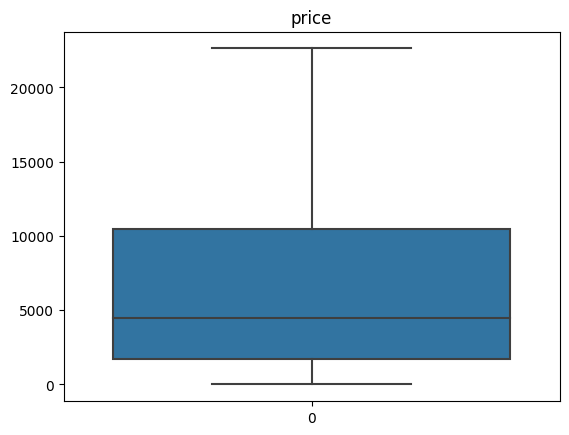

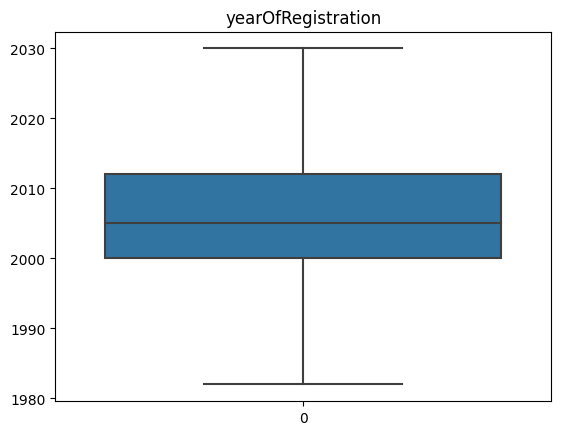

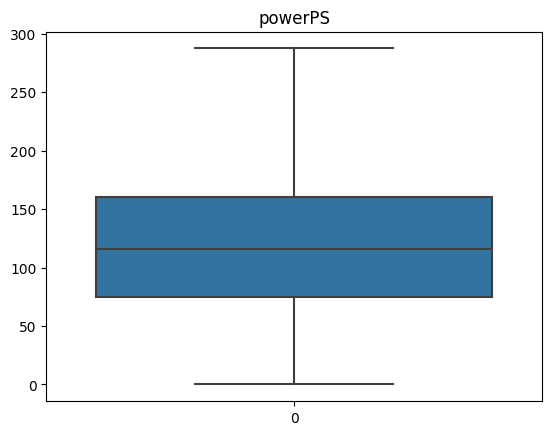

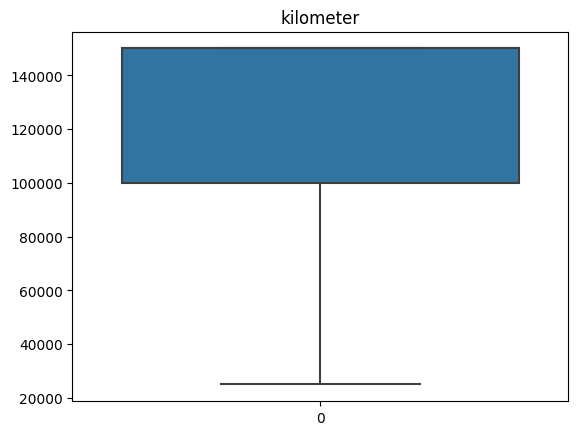

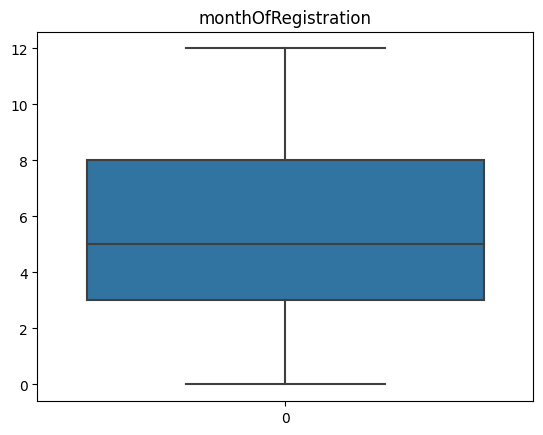

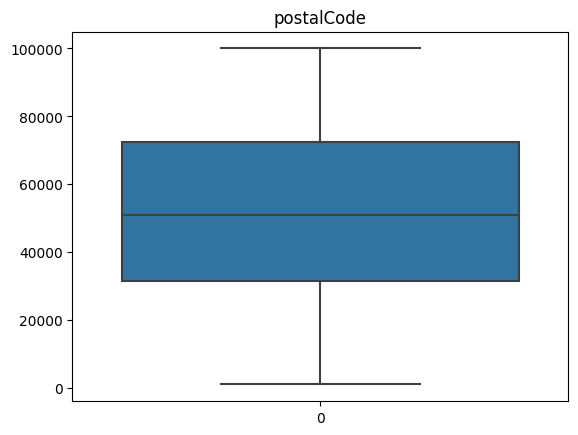

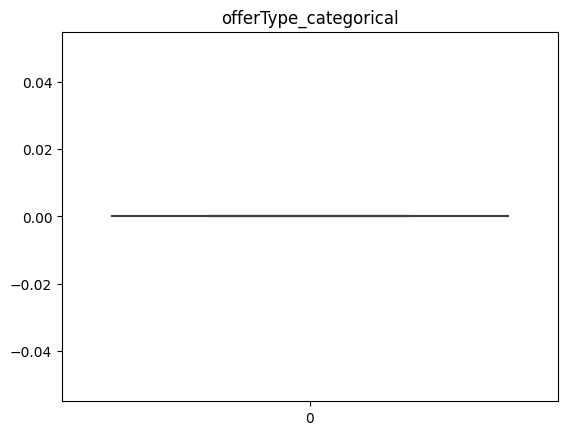

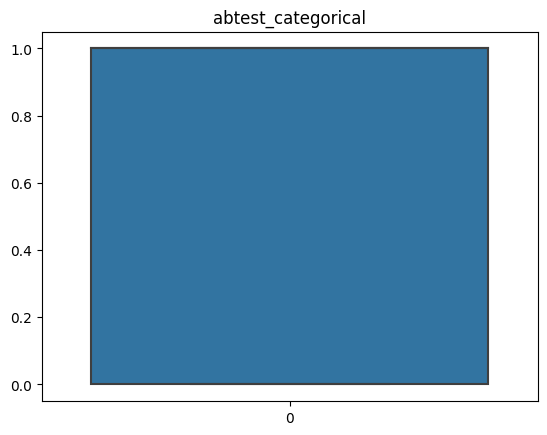

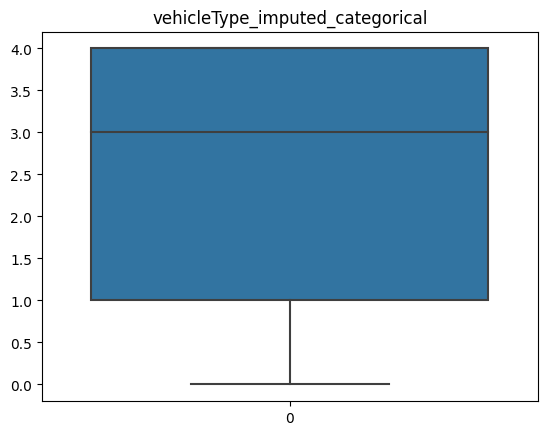

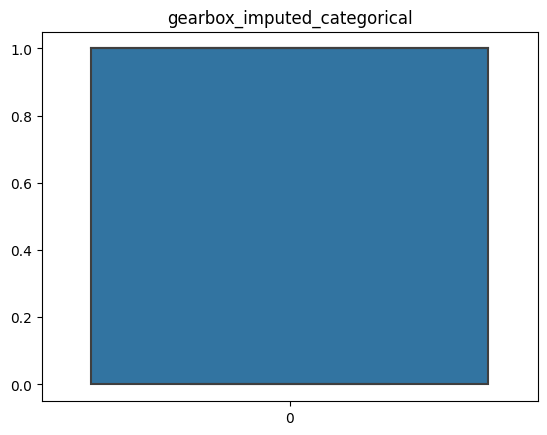

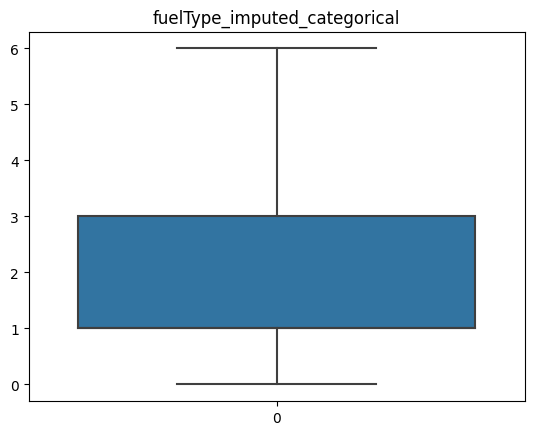

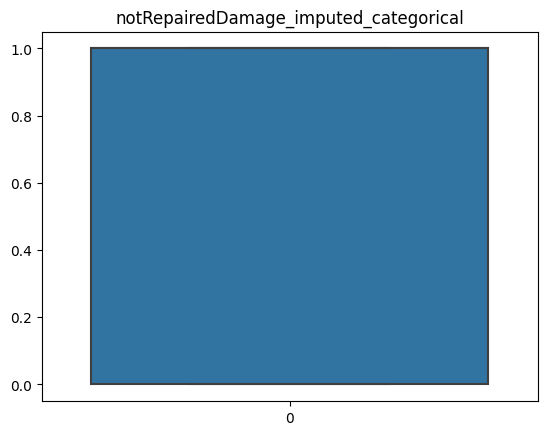

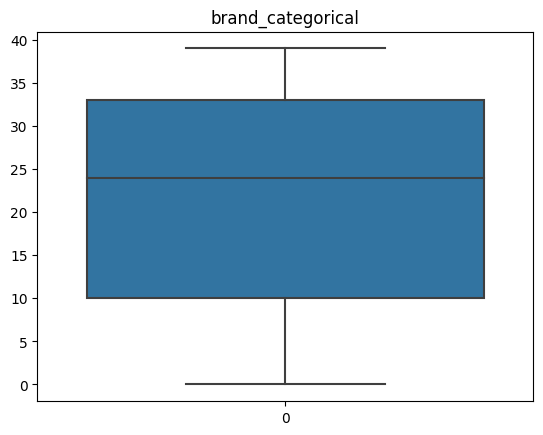

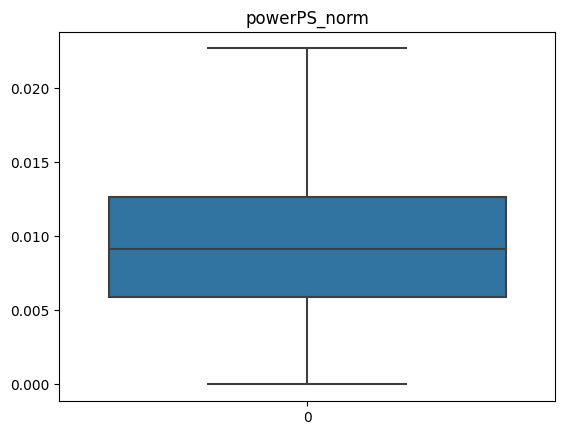

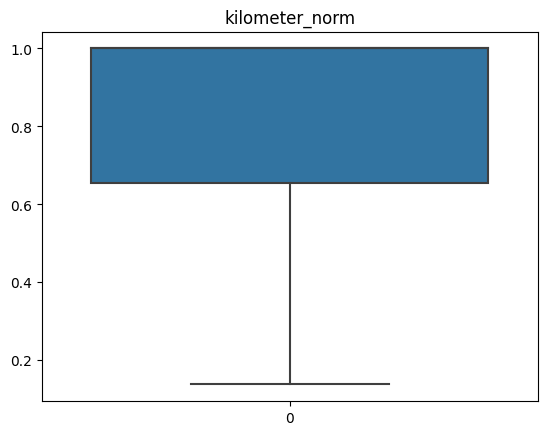

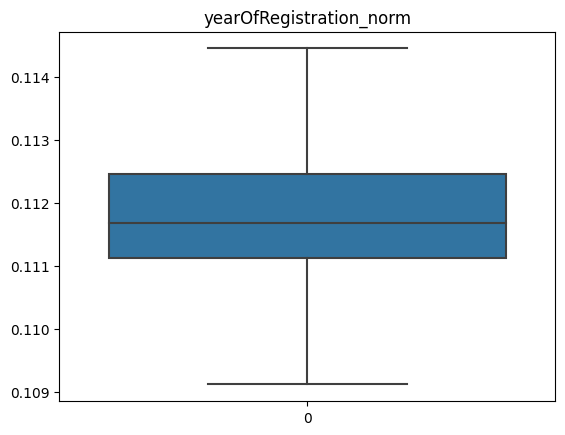

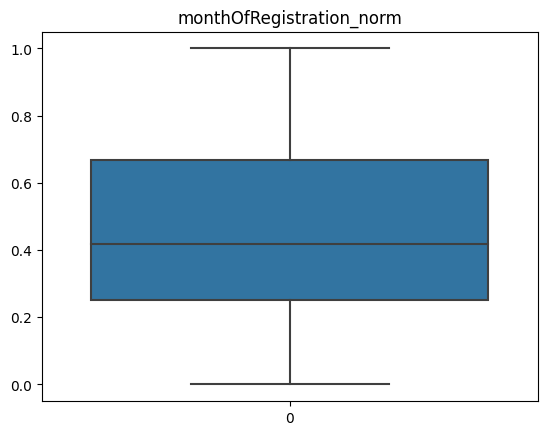

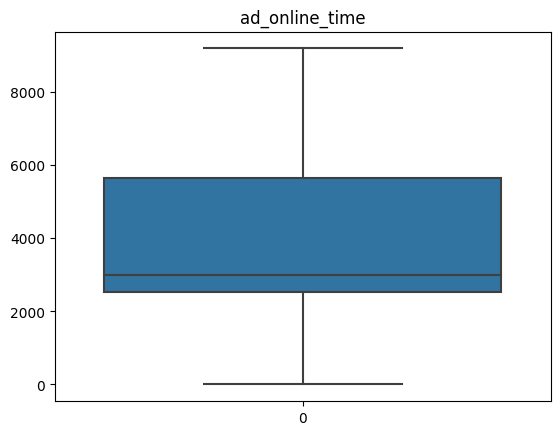

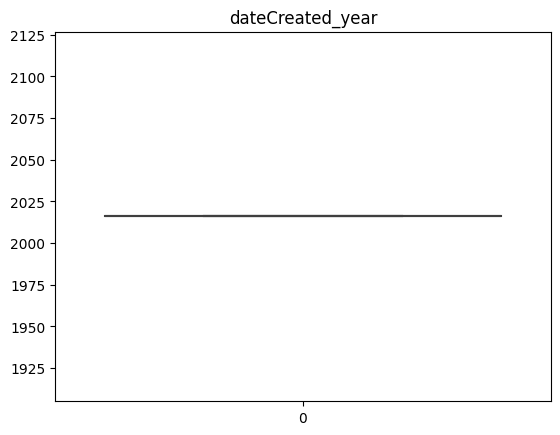

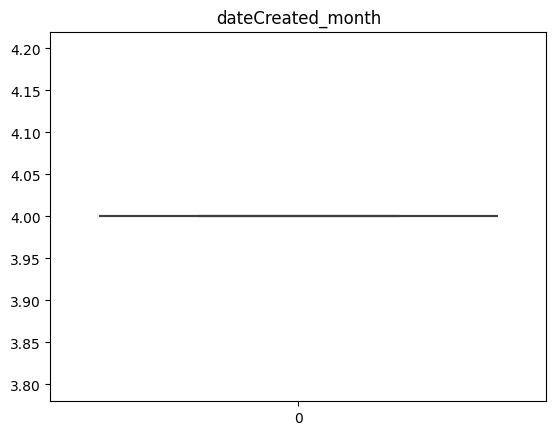

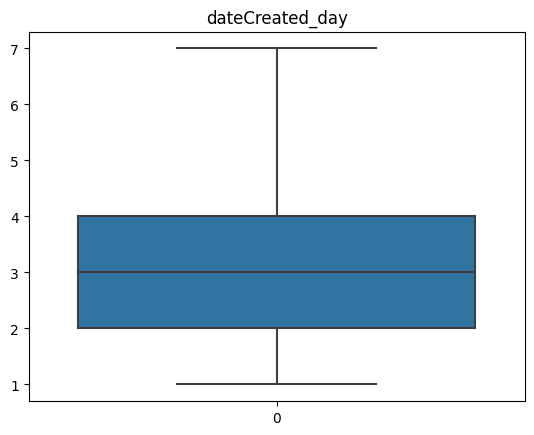

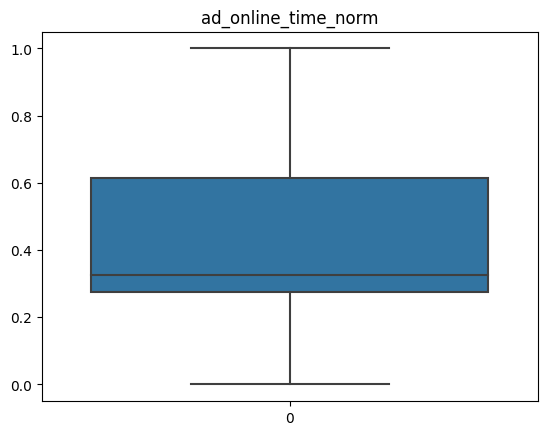

In [ ]:
for column in numeric_columns:
  sns.boxplot(cars_data[column])
  plt.title(column)
  plt.show()

Convert german to english

In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=ca000eff1179177fa0e91a228d60829afd6df8f9288e1000669a8e6eaa4261b7
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [ ]:
from googletrans import Translator
translator = Translator()
def convert_to_english(df, columns):
    for column in columns:
      df[column] = df[column].apply(lambda x: translator.translate(x, dest='en', src="de").text)

german_columns =  ["fuelType_imputed", "offerType", "vehicleType_imputed", "notRepairedDamage_imputed", "gearbox_imputed"]
convert_to_english(cars_data, german_columns)

<ipython-input-21-56c5219ccb96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: translator.translate(x, dest='en', src="de").text)
<ipython-input-21-56c5219ccb96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: translator.translate(x, dest='en', src="de").text)
<ipython-input-21-56c5219ccb96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

# EDA

In [ ]:
cars_data.corr(numeric_only=True)

price  yearOfRegistration   powerPS  \
price                                  1.000000            0.137078  0.580818   
yearOfRegistration                     0.137078            1.000000  0.007996   
powerPS                                0.580818            0.007996  1.000000   
kilometer                             -0.461355           -0.132970 -0.085426   
monthOfRegistration                    0.136933            0.012503  0.187707   
postalCode                             0.092768           -0.013802  0.106060   
offerType_categorical                       NaN                 NaN       NaN   
abtest_categorical                    -0.003091            0.004241  0.003239   
vehicleType_imputed_categorical       -0.065946            0.305953 -0.073307   
gearbox_imputed_categorical           -0.210167           -0.023430 -0.131409   
fuelType_imputed_categorical          -0.086273            0.179495 -0.184612   
notRepairedDamage_imputed_categorical  0.365583           -0.002004  0.351588   
brand_categorical                     -0.073629           -0.002397 -0.212621   
powerPS_norm                           0.580818            0.007996  1.000000   
kilometer_norm                        -0.461355           -0.132970 -0.085426   
yearOfRegistration_norm                0.137078            1.000000  0.007996   
monthOfRegistration_norm               0.136933            0.012503  0.187707   
ad_online_time                         0.118059           -0.006828  0.061190   
dateCreated_year                            NaN                 NaN       NaN   
dateCreated_month                           NaN                 NaN       NaN   
dateCreated_day                        0.003169            0.003599  0.007584   
ad_online_time_norm                    0.118059           -0.006828  0.061190   

                                       kilometer  monthOfRegistration  \
price                                  -0.461355             0.136933   
yearOfRegistration                     -0.132970             0.012503   
powerPS                                -0.085426             0.187707   
kilometer                               1.000000            -0.004439   
monthOfRegistration                    -0.004439             1.000000   
postalCode                             -0.049346             0.026370   
offerType_categorical                        NaN                  NaN   
abtest_categorical                      0.005812            -0.002468   
vehicleType_imputed_categorical        -0.003809            -0.144672   
gearbox_imputed_categorical             0.094881             0.068366   
fuelType_imputed_categorical            0.089502            -0.091768   
notRepairedDamage_imputed_categorical  -0.125957             0.218763   
brand_categorical                      -0.001373            -0.018806   
powerPS_norm                           -0.085426             0.187707   
kilometer_norm                          1.000000            -0.004439   
yearOfRegistration_norm                -0.132970             0.012503   
monthOfRegistration_norm               -0.004439             1.000000   
ad_online_time                         -0.061588             0.008945   
dateCreated_year                             NaN                  NaN   
dateCreated_month                            NaN                  NaN   
dateCreated_day                        -0.006558            -0.012134   
ad_online_time_norm                    -0.061588             0.008945   

                                       postalCode  offerType_categorical  \
price                                    0.092768                    NaN   
yearOfRegistration                      -0.013802                    NaN   
powerPS                                  0.106060                    NaN   
kilometer                               -0.049346                    NaN   
monthOfRegistration                      0.026370                    NaN   
postalCode                               1

<Axes: >

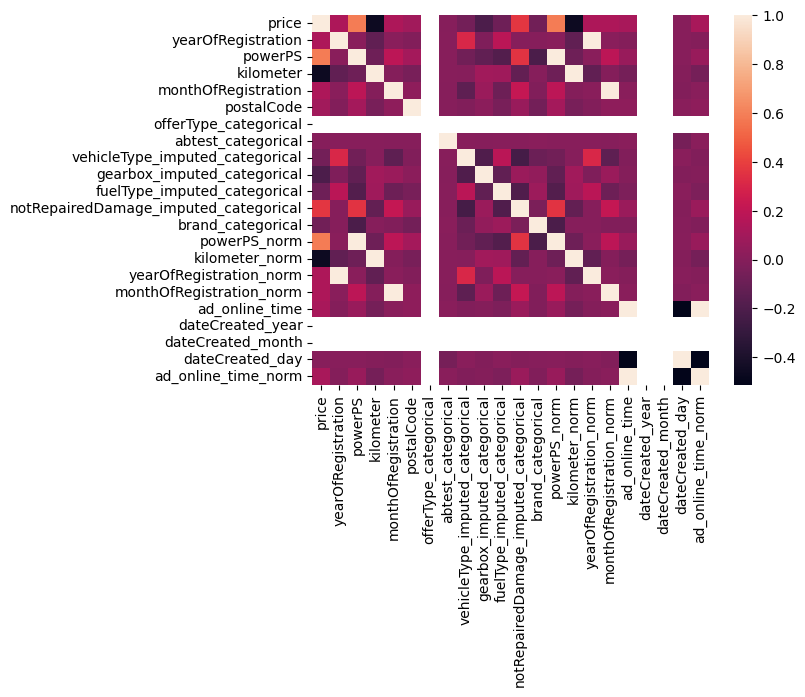

In [ ]:
sns.heatmap(cars_data.corr(numeric_only=True))

In [ ]:
print("Summary statictics of the data")
cars_data.describe()

Summary statictics of the data


price  yearOfRegistration       powerPS      kilometer  \
count  20383.000000        20383.000000  20383.000000   20383.000000   
mean    7030.541333         2005.352745    119.477408  122881.077368   
std     6800.813464            8.403497     72.814876   40816.135408   
min        1.000000         1982.000000      0.000000   25000.000000   
25%     1700.000000         2000.000000     75.000000  100000.000000   
50%     4500.000000         2005.000000    116.000000  150000.000000   
75%    10450.000000         2012.000000    160.000000  150000.000000   
max    22625.000000         2030.000000    287.500000  150000.000000   

       monthOfRegistration    postalCode  offerType_categorical  \
count         20383.000000  20383.000000                20383.0   
mean              5.413972  51878.693519                    0.0   
std               3.683143  25347.198810                    0.0   
min               0.000000   1067.000000                    0.0   
25%               3.000000  31655.000000                    0.0   
50%               5.000000  51069.000000                    0.0   
75%               8.000000  72336.000000                    0.0   
max              12.000000  99986.000000                    0.0   

       abtest_categorical  vehicleType_imputed_categorical  \
count        20383.000000                     20383.000000   
mean             0.553108                         2.623166   
std              0.497184                         1.260741   
min              0.000000                         0.000000   
25%              0.000000                         1.000000   
50%              1.000000                         3.000000   
75%              1.000000                         4.000000   
max              1.000000                         4.000000   

       gearbox_imputed_categorical  ...  brand_categorical  powerPS_norm  \
count                 20383.000000  ...       20383.000000  20383.000000   
mean                      0.689545  ...          21.421233      0.009420   
std                       0.462691  ...          12.759233      0.005741   
min                       0.000000  ...           0.000000      0.000000   
25%                       0.000000  ...          10.000000      0.005913   
50%                       1.000000  ...          24.000000      0.009145   
75%                       1.000000  ...          33.000000      0.012614   
max                       1.000000  ...          39.000000      0.022666   

       kilometer_norm  yearOfRegistration_norm  monthOfRegistration_norm  \
count    20383.000000             20383.000000              20383.000000   
mean         0.812973                 0.111718                  0.451164   
std          0.281491                 0.000934                  0.306929   
min          0.137931                 0.109123                  0.000000   
25%          0.655172                 0.111123                  0.250000   
50%          1.000000                 0.111679                  0.416667   
75%          1.000000                 0.112457                  0.666667   
max          1.000000                 0.114457                  1.000000   

       ad_online_time  dateCreated_year  dateCreated_month  dateCreated_day  \
count    20383.000000           20383.0            20383.0     20383.000000   
mean      3457.256243            2016.0                4.0         2.865525   
std       2451.283885               0.0                0.0         1.411060   
min          0.000000            2016.0                4.0         1.000000   
25%       2544.000000            2016.0                4.0         2.000000   
50%       2996.000000            2016.0                4.0         3.000000   
75%       5647.000000            2016.0                4.0         4.000000   
max       9197.000000            2016.0                4.0         7.000000   

       ad_online_time_norm  
count         20383.000000  
mean              0.375911  
std               0.266531  
min 

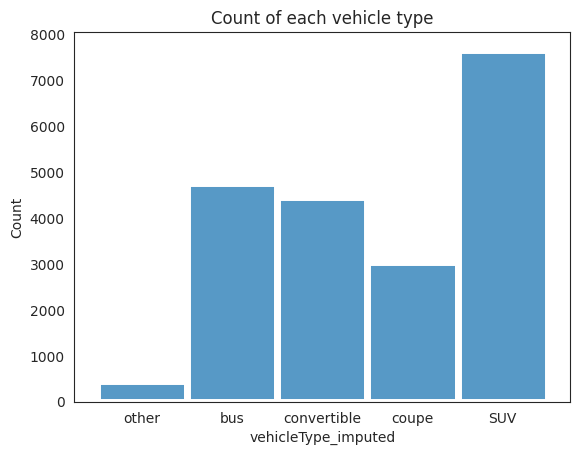

In [ ]:
sns.set_style("white")
sns.histplot(cars_data['vehicleType_imputed'], linewidth=5.0)
plt.title("Count of each vehicle type")
plt.show()

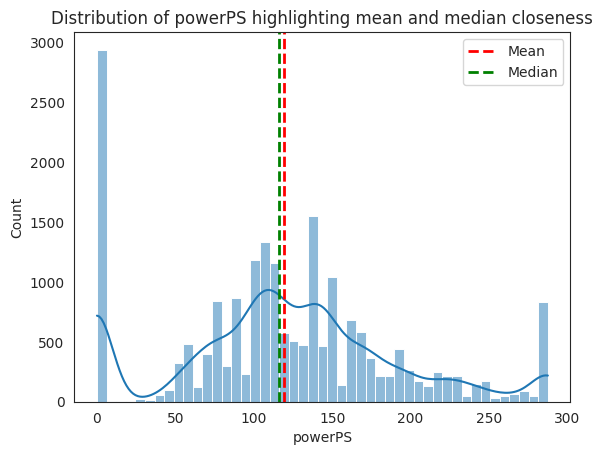

In [ ]:
sns.histplot(cars_data['powerPS'], kde=True)
plt.axvline(cars_data['powerPS'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(cars_data['powerPS'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.title("Distribution of powerPS highlighting mean and median closeness")
plt.show()

<ipython-input-27-7c88a0c2c02e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data["price_bin"] = pd.cut(cars_data["price"], bins)


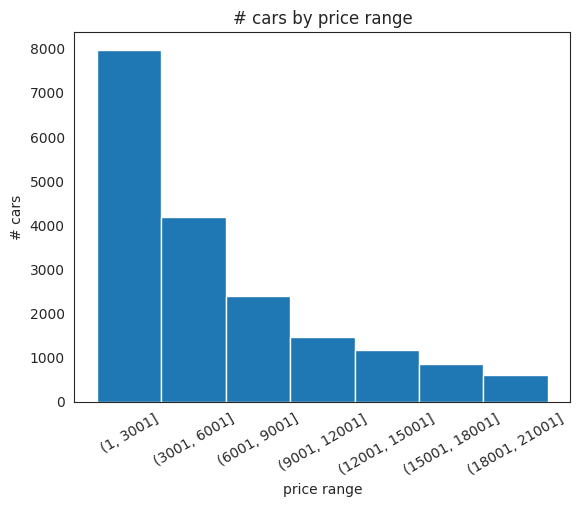

In [ ]:
min_price = cars_data["price"].min()
max_price = cars_data["price"].max()
bins = np.arange(min_price, max_price+1, 3000)
cars_data["price_bin"] = pd.cut(cars_data["price"], bins)
group_by_price = cars_data.groupby("price_bin")["price_bin"].count().to_frame("count").reset_index()
plt.bar(group_by_price.index, group_by_price["count"], width= 1, tick_label=group_by_price["price_bin"])
plt.title("# cars by price range")
plt.xlabel("price range")
plt.ylabel("# cars")
plt.xticks(rotation=30)
plt.show()

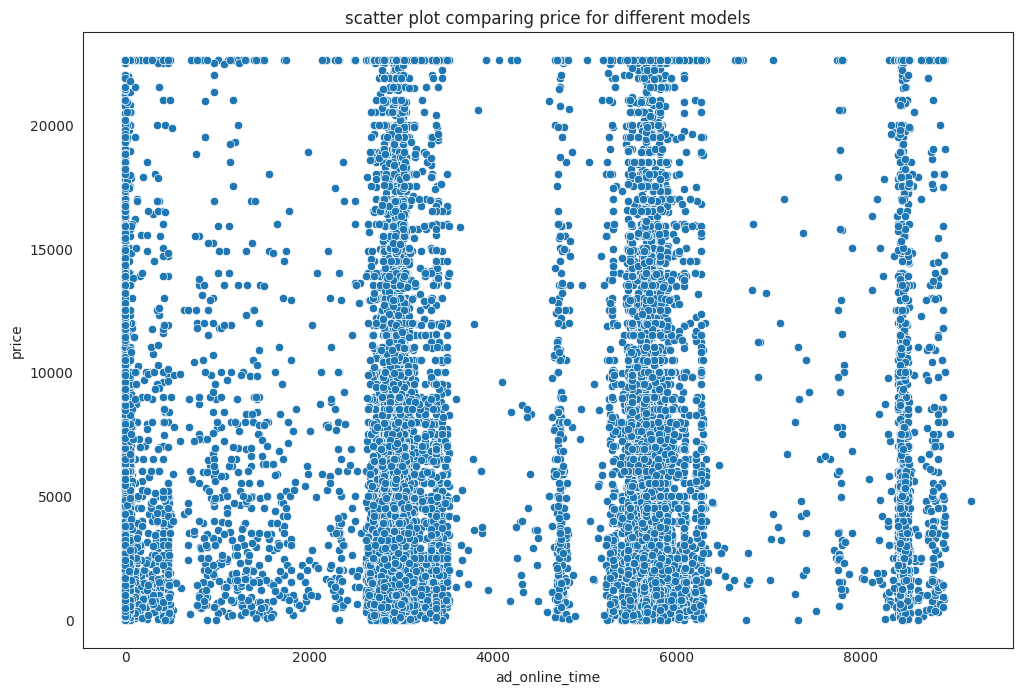

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='ad_online_time',y='price',data=cars_data)
plt.title('scatter plot comparing price for different models')
plt.xticks(fontsize = 10, va='center', ha='center')
plt.show()

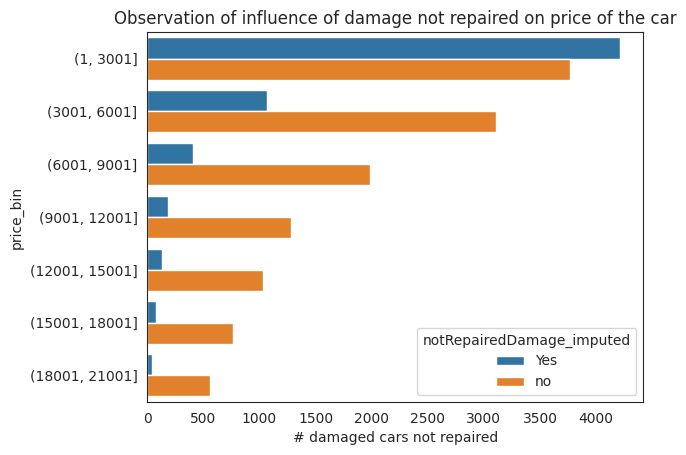

In [ ]:
sns.countplot(hue="notRepairedDamage_imputed", y="price_bin", data=cars_data)
plt.title("Observation of influence of damage not repaired on price of the car")
plt.xlabel("# damaged cars not repaired")
plt.show()

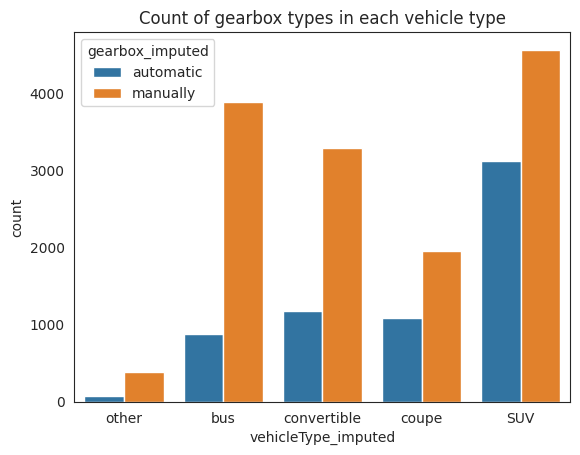

In [ ]:
sns.countplot(x='vehicleType_imputed', hue='gearbox_imputed', data=cars_data)
plt.title('Count of gearbox types in each vehicle type')
plt.show()


Distribution of kilometer, registration month, online ad time and date created for car sale


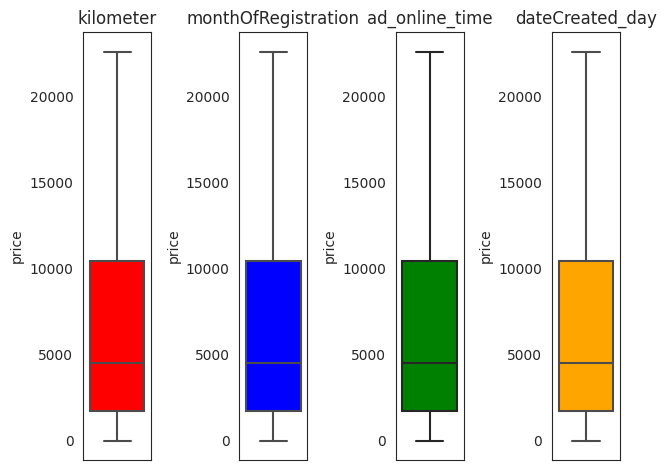

In [ ]:
print("Distribution of kilometer, registration month, online ad time and date created for car sale")
columns_to_plot = ['kilometer','monthOfRegistration','ad_online_time','dateCreated_day']
fig, axes = plt.subplots(ncols=len(columns_to_plot))
colors = ["red", "blue", "green", "orange"]
for column, axis, color in zip(columns_to_plot, axes, colors):
        sns.boxplot(data=cars_data[column], y =cars_data['price'], ax=axis, palette=[color], boxprops=dict(facecolor=color))
        axis.set_title(column)
plt.tight_layout()
plt.show()

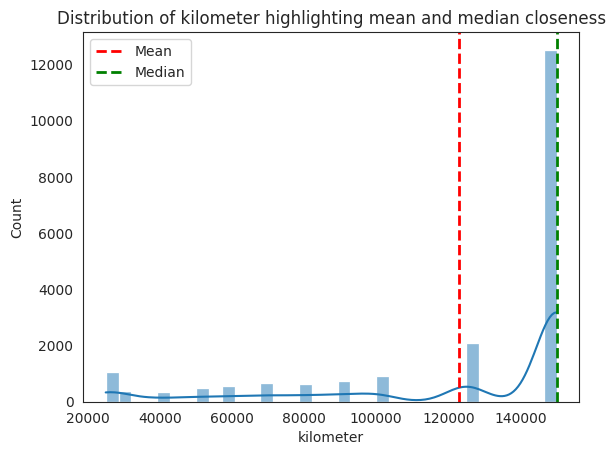

In [ ]:
sns.histplot(cars_data['kilometer'], kde=True)
plt.axvline(cars_data['kilometer'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(cars_data['kilometer'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.title("Distribution of kilometer highlighting mean and median closeness")
plt.show()

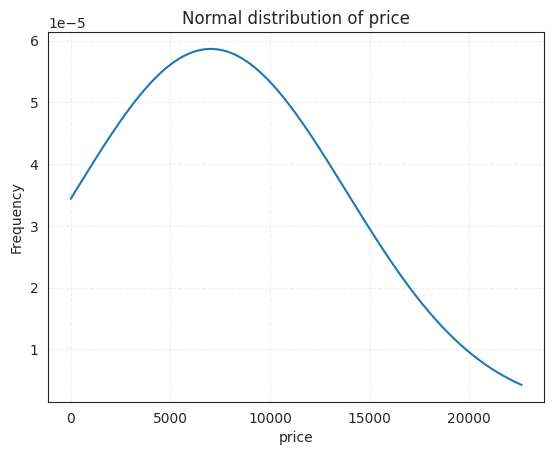

In [ ]:
cars_mean = np.mean(cars_data["price"])
cars_std = np.std(cars_data["price"])

pdf = stats.norm.pdf(cars_data["price"].sort_values(), cars_mean, cars_std)

plt.plot(cars_data["price"].sort_values(), pdf)
plt.xlabel("price")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3, linestyle="--")
plt.title("Normal distribution of price")
plt.show()

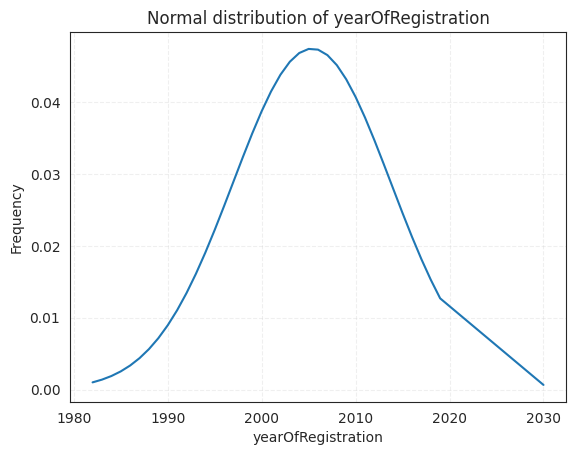

In [ ]:
cars_mean = np.mean(cars_data["yearOfRegistration"])
cars_std = np.std(cars_data["yearOfRegistration"])

pdf = stats.norm.pdf(cars_data["yearOfRegistration"].sort_values(), cars_mean, cars_std)

plt.plot(cars_data["yearOfRegistration"].sort_values(), pdf)
plt.xlabel("yearOfRegistration")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3, linestyle="--")
plt.title("Normal distribution of yearOfRegistration")
plt.show()

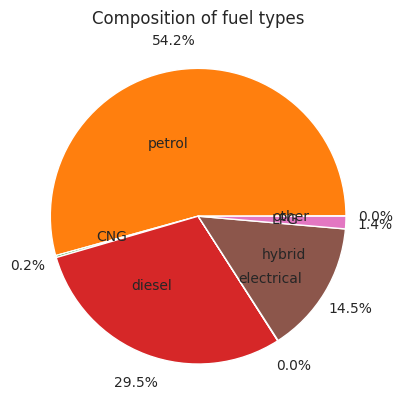

In [ ]:
group_by_brands = cars_data.groupby("fuelType_imputed")["fuelType_imputed"].count().to_frame("count").reset_index()
fuel_types = group_by_brands["fuelType_imputed"]
fuel_types_count = group_by_brands["count"]
fig, ax = plt.subplots()
ax.pie(fuel_types_count, labels=fuel_types, autopct='%1.1f%%', pctdistance=1.2, labeldistance=0.5)
plt.title("Composition of fuel types")
plt.show()

#Phase 2

Dropping the columns which are already normalized in the data cleaning step. These are not dropped in Phase 1 as they are needed for the EDA step for labeling the graphs, so dropping them here.

In [ ]:
cars_data = cars_data.drop(["name", "offerType", "abtest", "powerPS", "kilometer", "price_bin", "vehicleType_imputed", "gearbox_imputed", "model_imputed", "fuelType_imputed", "notRepairedDamage_imputed", "ad_online_time", "yearOfRegistration", "monthOfRegistration", "dateCreated_year", "dateCreated_time", "dateCreated", "dateCreated_month", "postalCode", "offerType_categorical", "brand"], axis = 1)

In [ ]:
cars_data

price  abtest_categorical  vehicleType_imputed_categorical  \
0       2200                 1.0                              2.0   
1      14500                 0.0                              1.0   
2        300                 1.0                              4.0   
3       1850                 1.0                              1.0   
4      10400                 0.0                              3.0   
...      ...                 ...                              ...   
21260   5390                 0.0                              3.0   
21261   1950                 1.0                              1.0   
21262   9900                 1.0                              4.0   
21263   3500                 0.0                              4.0   
21264    999                 0.0                              2.0   

       gearbox_imputed_categorical  fuelType_imputed_categorical  \
0                              1.0                             1   
1                              1.0                             1   
2                              0.0                             1   
3                              1.0                             1   
4                              1.0                             1   
...                            ...                           ...   
21260                          0.0                             1   
21261                          1.0                             3   
21262                          1.0                             3   
21263                          0.0                             5   
21264                          1.0                             1   

       notRepairedDamage_imputed_categorical  brand_categorical  powerPS_norm  \
0                                        1.0               25.0      0.008594   
1                                        0.0               10.0      0.009855   
2                                        0.0               38.0      0.004730   
3                                        1.0               20.0      0.008042   
4                                        1.0               38.0      0.012614   
...                                      ...                ...           ...   
21260                                    1.0               20.0      0.017187   
21261                                    1.0               38.0      0.005519   
21262                                    1.0               39.0      0.014585   
21263                                    0.0               38.0      0.000000   
21264                                    0.0               27.0      0.007490   

       kilometer_norm  yearOfRegistration_norm  monthOfRegistration_norm  \
0            1.000000                 0.111568                  0.666667   
1            0.172414                 0.112679                  0.666667   
2            1.000000                 0.112901                  0.000000   
3            1.000000                 0.111568                  0.083333   
4            0.655172                 0.112124                  0.333333   
...               ...                      ...                       ...   
21260        1.000000                 0.111457                  0.166667   
21261        1.000000                 0.110012                  0.583333   
21262        1.000000                 0.111790                  0.416667   
21263        1.000000                 0.110568                  0.000000   
21264        1.000000                 0.111123                  0.333333   

       dateCreated_day  ad_online_time_norm  
0                    1             0.609982  
1                    4             0.000000  
2                    1             0.000000  
3                    1             0.625313  
4                    1             0.605524  
...                ...                  ...  
21260                1             0.599761  
21261                5             0.343373  
21262                1             0.598891  
21263          

In [ ]:
cars_data.to_csv('/content/drive/MyDrive/phase3_autos.csv', index=False)

In [ ]:
path = "/content/drive/MyDrive/phase3_autos.csv"
cars_data = pd.read_csv(path)
cars_data.head()

price  abtest_categorical  vehicleType_imputed_categorical  \
0   2200                 1.0                              2.0   
1  14500                 0.0                              1.0   
2    300                 1.0                              4.0   
3   1850                 1.0                              1.0   
4  10400                 0.0                              3.0   

   gearbox_imputed_categorical  fuelType_imputed_categorical  \
0                          1.0                             1   
1                          1.0                             1   
2                          0.0                             1   
3                          1.0                             1   
4                          1.0                             1   

   notRepairedDamage_imputed_categorical  brand_categorical  powerPS_norm  \
0                                    1.0               25.0      0.008594   
1                                    0.0               10.0      0.009855   
2                                    0.0               38.0      0.004730   
3                                    1.0               20.0      0.008042   
4                                    1.0               38.0      0.012614   

   kilometer_norm  yearOfRegistration_norm  monthOfRegistration_norm  \
0        1.000000                 0.111568                  0.666667   
1        0.172414                 0.112679                  0.666667   
2        1.000000                 0.112901                  0.000000   
3        1.000000                 0.111568                  0.083333   
4        0.655172                 0.112124                  0.333333   

   dateCreated_day  ad_online_time_norm  
0                1             0.609982  
1                4             0.000000  
2                1             0.000000  
3                1             0.625313  
4                1             0.605524

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X_data = cars_data.drop("price", axis = 1)
Y_target = cars_data.loc[:,"price"]
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_target, test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(16306, 12) (4077, 12) (16306,) (4077,)


#Decision Tree

In [ ]:
clf = tree.DecisionTreeRegressor()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("R2 score =", r2_score(Y_test, y_pred))
print("MSE = ", mean_squared_error(Y_test, y_pred))

R2 score = 0.6322153606099282
MSE =  17687231.287527595


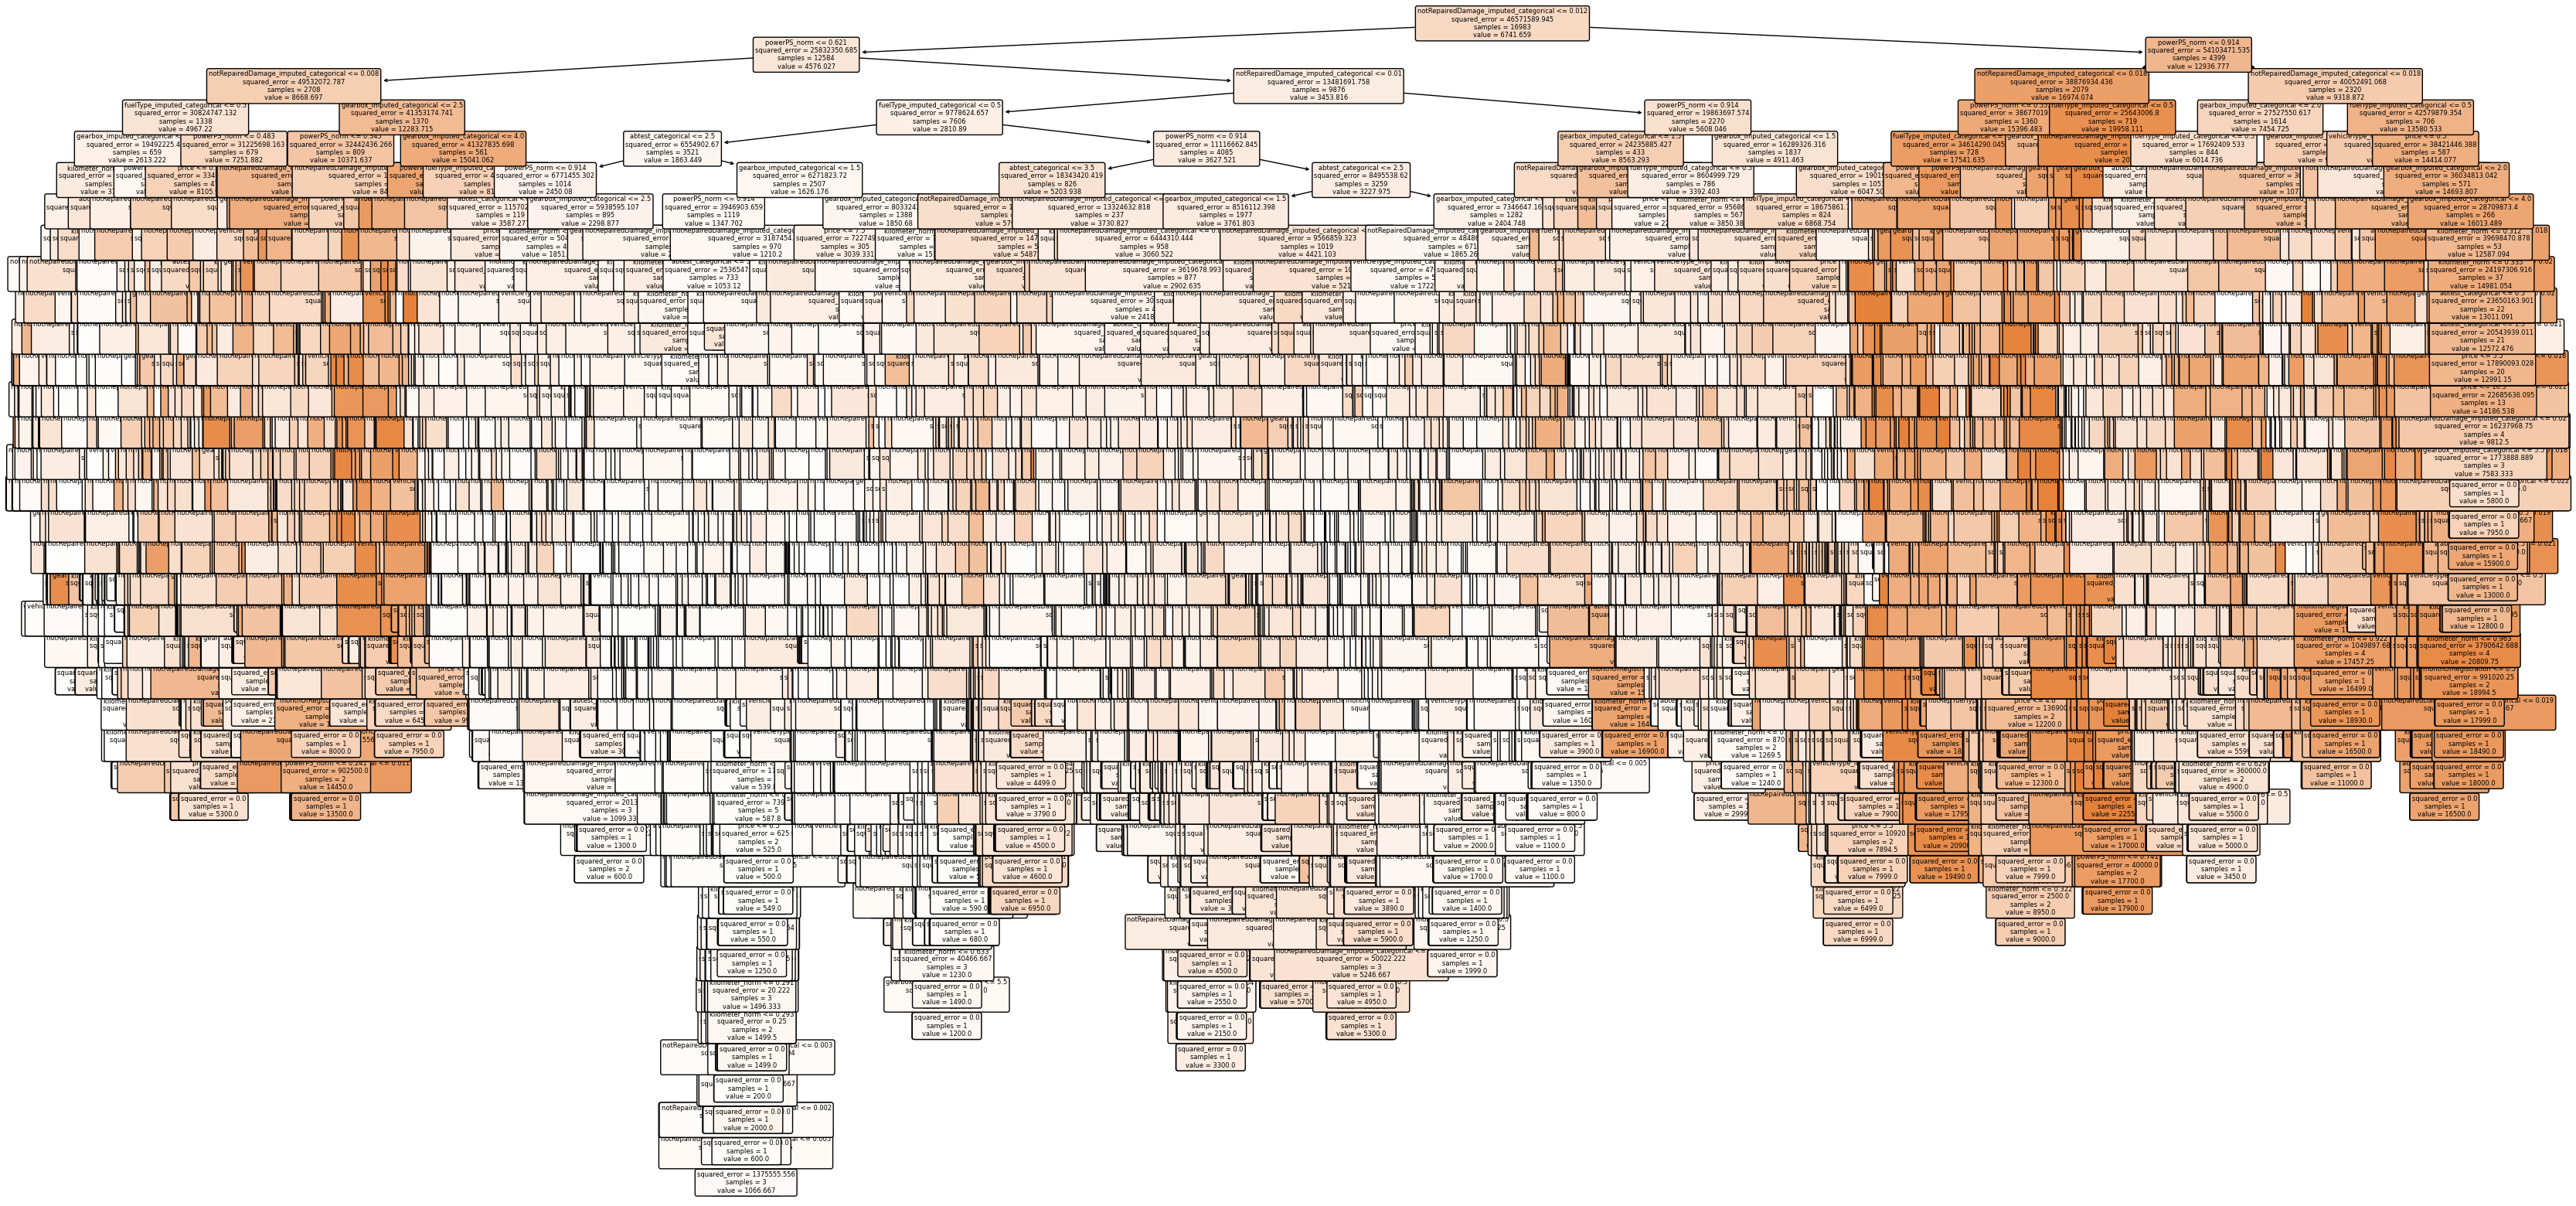

In [ ]:
plt.figure(figsize=(40,20))
_ = tree.plot_tree(clf, feature_names = cars_data.columns,
             filled=True, fontsize=6, rounded = True)
plt.show()

Hyperparameter tuning - max depth

In [ ]:
r2_scores = []
mse_scores = []
for max_d in range(1,101):
  model = tree.DecisionTreeRegressor(max_depth=max_d, random_state=42)
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  r2score = r2_score(Y_test, y_pred)
  print('The R2 score for max_depth {} is:'.format(max_d), r2score)
  r2_scores.append(r2score)
  mse_score = mean_squared_error(Y_test,y_pred)
  print('The MSE  for max_depth {} is:'.format(max_d), mse_score)
  mse_scores.append(mse_score)
  print('')

The R2 score for max_depth 1 is: 0.28971253096256755
The MSE  for max_depth 1 is: 34158628.17526032

The R2 score for max_depth 2 is: 0.4554126447987953
The MSE  for max_depth 2 is: 26189898.859508134

The R2 score for max_depth 3 is: 0.5605864696210219
The MSE  for max_depth 3 is: 21131955.79774891

The R2 score for max_depth 4 is: 0.6400525644566475
The MSE  for max_depth 4 is: 17310330.18226581

The R2 score for max_depth 5 is: 0.6749136696476867
The MSE  for max_depth 5 is: 15633815.275402669

The R2 score for max_depth 6 is: 0.7070148450280263
The MSE  for max_depth 6 is: 14090028.904946443

The R2 score for max_depth 7 is: 0.737649235703733
The MSE  for max_depth 7 is: 12616782.07731308

The R2 score for max_depth 8 is: 0.7381183566056396
The MSE  for max_depth 8 is: 12594221.45621809

The R2 score for max_depth 9 is: 0.7351565306920704
The MSE  for max_depth 9 is: 12736659.43311013

The R2 score for max_depth 10 is: 0.7397176599053767
The MSE  for max_depth 10 is: 12517308.92553

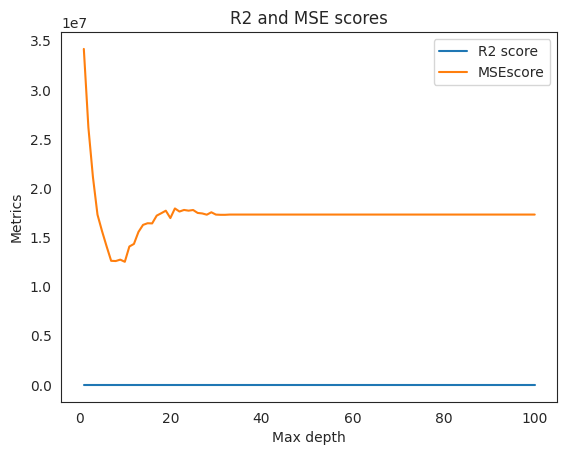

In [ ]:
plt.plot(range(1, 101), r2_scores, label='R2 score')
plt.plot(range(1, 101), mse_scores, label='MSEscore')
plt.xlabel('Max depth')
plt.ylabel('Metrics')
plt.legend()
plt.title('R2 and MSE scores')
plt.show()

Hyperparameter tuning - max leaf nodes

In [ ]:
r2_scores = []
mse_scores = []
for max_leaf_nodes in range(20,101):
  model = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  r2score = r2_score(Y_test, y_pred)
  print('The R2 score for max_leaf nodes {} is:'.format(max_leaf_nodes), r2score)
  r2_scores.append(r2score)
  mse_score = mean_squared_error(Y_test,y_pred)
  print('The MSE  for max_leaf_nodes {} is:'.format(max_leaf_nodes), mse_score)
  mse_scores.append(mse_score)
  print('')

The R2 score for max_leaf nodes 20 is: -0.29922091239330517
The MSE  for max_leaf_nodes 20 is: 62481186.84130488

The R2 score for max_leaf nodes 21 is: -0.29922091239330517
The MSE  for max_leaf_nodes 21 is: 62481186.84130488

The R2 score for max_leaf nodes 22 is: -0.22942013008622575
The MSE  for max_leaf_nodes 22 is: 59124378.40372823

The R2 score for max_leaf nodes 23 is: -0.22830873062683832
The MSE  for max_leaf_nodes 23 is: 59070929.78955114

The R2 score for max_leaf nodes 24 is: -0.22830873062683832
The MSE  for max_leaf_nodes 24 is: 59070929.78955114

The R2 score for max_leaf nodes 25 is: -0.22830873062683832
The MSE  for max_leaf_nodes 25 is: 59070929.78955114

The R2 score for max_leaf nodes 26 is: -0.22830873062683832
The MSE  for max_leaf_nodes 26 is: 59070929.78955114

The R2 score for max_leaf nodes 27 is: -0.22830873062683832
The MSE  for max_leaf_nodes 27 is: 59070929.78955114

The R2 score for max_leaf nodes 28 is: -0.22830873062683832
The MSE  for max_leaf_nodes 

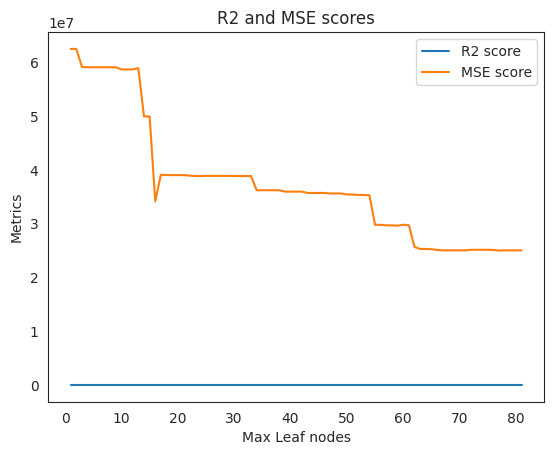

In [ ]:
plt.plot(range(1, 82), r2_scores, label='R2 score')
plt.plot(range(1, 82), mse_scores, label='MSE score')
plt.xlabel('Max Leaf nodes')
plt.ylabel('Metrics')
plt.legend()
plt.title('R2 and MSE scores')
plt.show()

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=4, max_leaf_nodes=75)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("R2 score =", r2_score(Y_test, y_pred))
print("MSE = ", mean_squared_error(Y_test, y_pred))

R2 score = 0.6400525644566475
MSE =  17310330.18226581


#KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print("R2 score =", r2_score(Y_test, y_pred))
print("MSE = ", mean_squared_error(Y_test, y_pred))

R2 score = 0.37617839074297876
MSE =  28195020.306349505


Best k value: 16


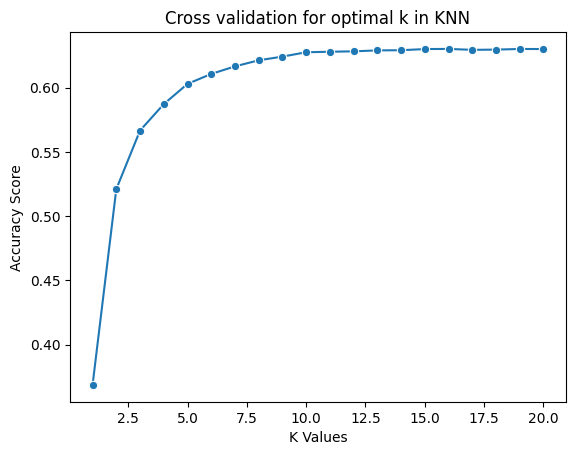

In [ ]:
def cross_val(X, Y, k_values, cv):
  k_values = [i for i in range (1,21)]
  scores = []
  for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    score = cross_val_score(knn, X, Y, cv=cv)
    scores.append(np.mean(score))
  best_index = np.argmax(scores)
  best_k = k_values[best_index]
  sns.lineplot(x = k_values, y = scores, marker = 'o')
  plt.xlabel("K Values")
  plt.ylabel("Accuracy Score")
  plt.title("Cross validation for optimal k in KNN")
  return best_k

print("Best k value:", cross_val(X_train, Y_train, range(1, 20), 5))

In [ ]:
knn = KNeighborsRegressor(n_neighbors=16)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print("R2 score =", r2_score(Y_test, y_pred))
print("MSE = ", mean_squared_error(Y_test, y_pred))

R2 score = 0.39697210757501555
MSE =  27255201.519016977


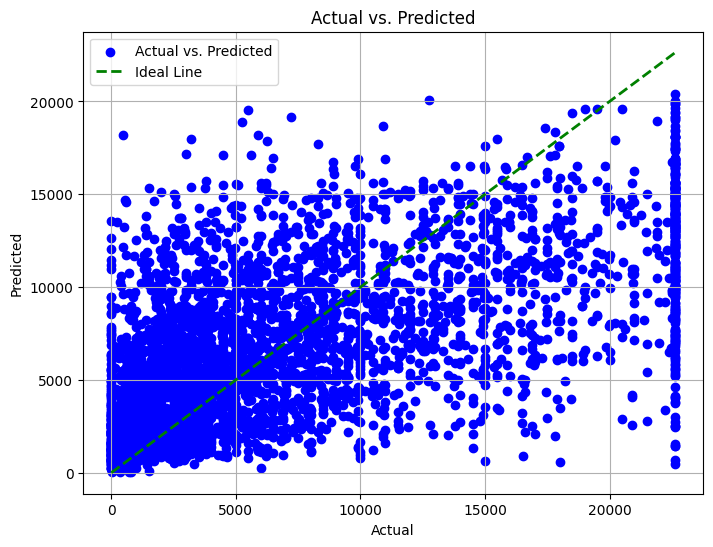

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, c='b', marker='o', label='Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='green', linewidth=2, label='Ideal Line')

plt.legend()
plt.grid(True)
plt.show()


#Support Vector Regression

In [ ]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)
print("R2 score =", r2_score(Y_test, y_pred))
print("MSE = ", mean_squared_error(Y_test, y_pred))

R2 score = -0.13153106120889535
MSE =  51142090.58267073


In [ ]:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.4 MB/s eta 0:00:00


In [ ]:
def objective_lr(trial):
   max_iter = trial.suggest_int("max_iter", 100, 1000)
   C = trial.suggest_float("C", 0.01, 10)
   epsilon = trial.suggest_float("epsilon", 0.001, 1)
   linear_reg_model = svm.SVR(max_iter=max_iter,C=C,  epsilon=epsilon)
   linear_reg_model.fit(X_train,Y_train)

   Y_predict = linear_reg_model.predict(X_test)
   return mean_squared_error(Y_test, Y_predict)

study = optuna.create_study(study_name="SVR", direction="minimize")
val = study.optimize(objective_lr, n_trials=50)

print("Best Params : {}".format(study.best_params), "\n")
print("Best MSE score : {}".format(study.best_value))

[I 2023-11-11 18:06:34,019] A new study created in memory with name: SVR
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=354).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2023-11-11 18:06:34,769] Trial 0 finished with value: 65679685.96608656 and parameters: {'max_iter': 354, 'C': 3.9896663989037155, 'epsilon': 0.8661254631748295}. Best is trial 0 with value: 65679685.96608656.
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2023-11-11 18:06:36,796] Trial 1 finished with value: 65364002.986885004 and parameters: {'max_iter': 947, 'C': 9.945188000044586, 'epsilon': 0.2123657397822439}. Best is trial 1 with value: 65364002.986885004.
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: Conv

Best Params : {'max_iter': 1000, 'C': 9.963343040103931, 'epsilon': 0.05652281966170325} 

Best MSE score : 65313582.36748211


In [ ]:
from sklearn import svm
regr = svm.SVR(kernel="linear")
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)
print("R2 score =", r2_score(Y_test, y_pred))
print("MSE = ", mean_squared_error(Y_test, y_pred))

R2 score = 0.044715326723126836
MSE =  42676018.995486684


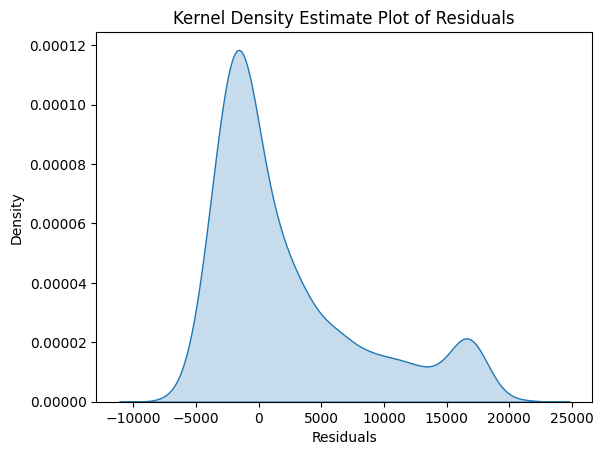

In [ ]:
import seaborn as sns
residuals = Y_test - y_pred
sns.kdeplot(residuals, fill=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Kernel Density Estimate Plot of Residuals")
plt.show()

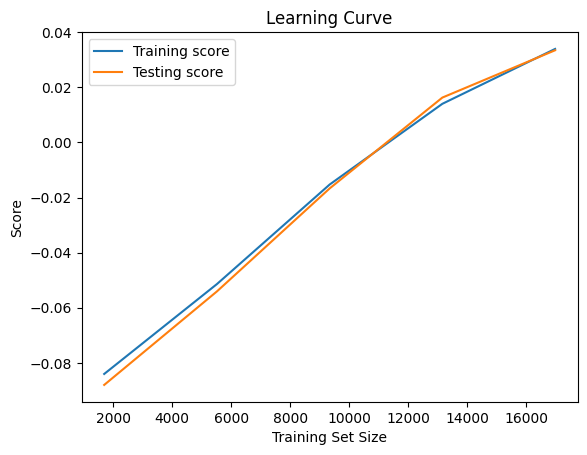

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(regr, X_data, Y_target, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Testing score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
linReg = LinearRegression()
linReg.fit(X_train,Y_train)
Y_pred = linReg.predict(X_test)

r2_score = r2_score(Y_test, Y_pred)
mean_square_error = mean_squared_error(Y_test, Y_pred)
mean_absolute_error = mean_absolute_error(Y_test, Y_pred)
intercept = linReg.intercept_
rmse = np.sqrt(mean_square_error)
print('r2_score', r2_score)
print('mean_square_error',mean_square_error)
print('mean_absolute_error', mean_absolute_error)
print('intercept', intercept)

print('root mean square error', rmse)
coefficients = pd.DataFrame({'feature_name': X_train.columns, 'coefficient_value': linReg.coef_})
print(coefficients)


r2_score 0.5264072809165905
mean_square_error 21871049.583725493
mean_absolute_error 3553.896305041211
intercept 7502.74547925004
root mean square error 4676.649397135249
                            feature_name  coefficient_value
0                    monthOfRegistration          58.755104
1                     abtest_categorical         -60.377607
2        vehicleType_imputed_categorical        -154.226052
3            gearbox_imputed_categorical       -1716.937386
4           fuelType_imputed_categorical         205.064954
5  notRepairedDamage_imputed_categorical        2457.556666
6                           powerPS_norm      557439.015657
7                         kilometer_norm       -8953.378740
8                    ad_online_time_norm        1442.759327


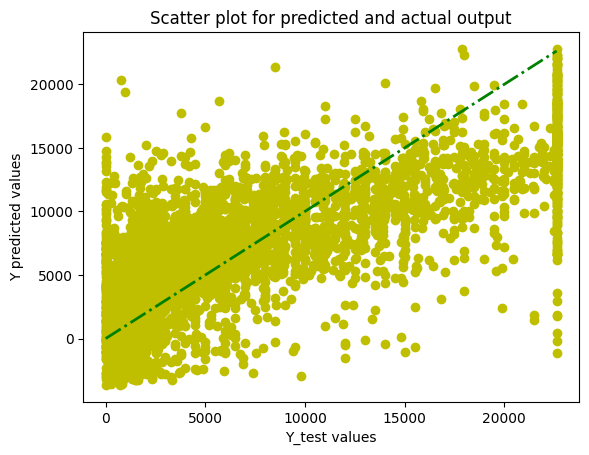

In [ ]:
# Scatter plot for predicted and actual output
plt.scatter(Y_test, Y_pred, c='y', label='Actual vs. Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='-.', color='green', linewidth=2, label='Linear Regression')
plt.xlabel('Y_test values')
plt.ylabel('Y predicted values')
plt.title('Scatter plot for predicted and actual output')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


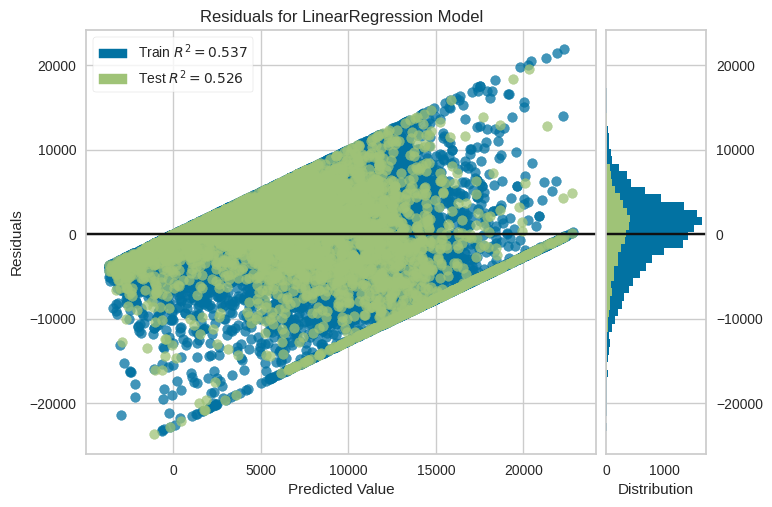

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
#Residual plot
from yellowbrick.regressor import ResidualsPlot
vis = ResidualsPlot(linReg)
vis.fit(X_train, Y_train)
vis.score(X_test, Y_test)
plt.title('Plot comparing the residuals vs predicted values')
vis.show()

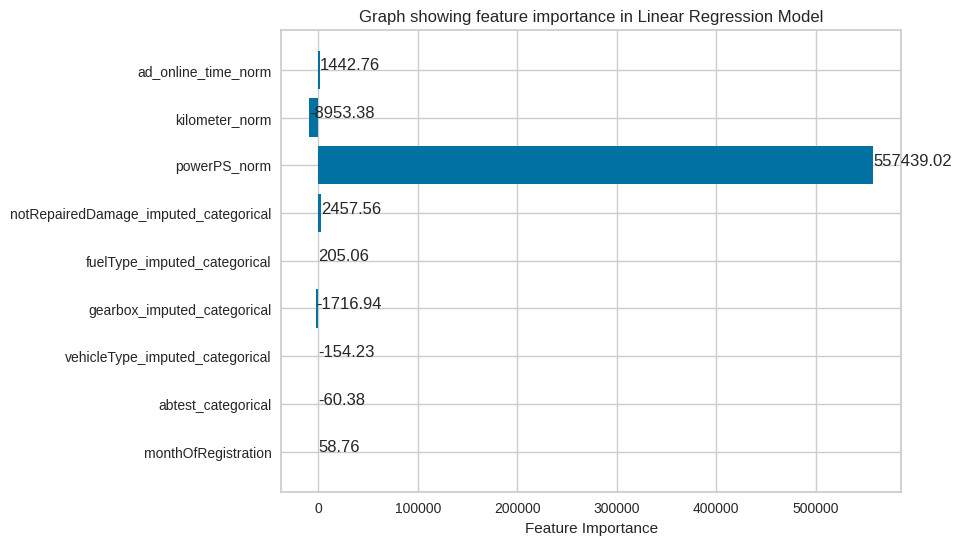

In [ ]:
# Plot showing feature importance
plt.figure(figsize=(8, 6))
plt.barh(coefficients['feature_name'], coefficients['coefficient_value'])
for i, j in enumerate(coefficients['coefficient_value']):
    plt.text(j, i, f'{j:.2f}', ha='left')
plt.xlabel('Feature Importance')
plt.title('Graph showing feature importance in Linear Regression Model')
plt.show()

#KMeans

In [ ]:
#k-means
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)
pca_data = pca.fit_transform(cars_data)

wcss=[]
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit_predict(pca_data)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[982839564135.4268,
 221917261171.67093,
 95478923901.51038,
 50083577039.762184,
 30491063813.41934,
 21289740091.52276,
 14896926153.892742,
 11149918546.19823,
 8504756090.260786]

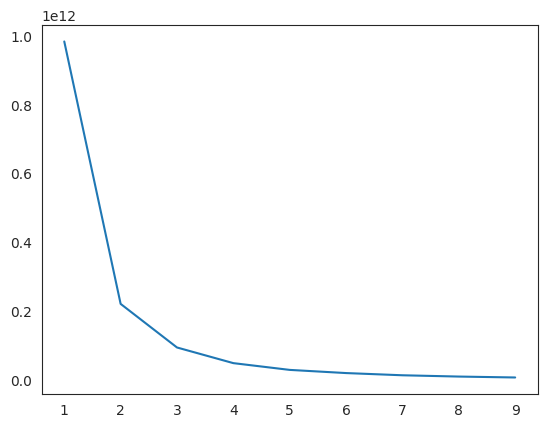

In [ ]:
plt.plot(range(1,10), wcss)

In [ ]:
k_means = KMeans(n_clusters = 3)
y_pred = k_means.fit_predict(pca_data)
print(y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 1 2 ... 0 2 2]


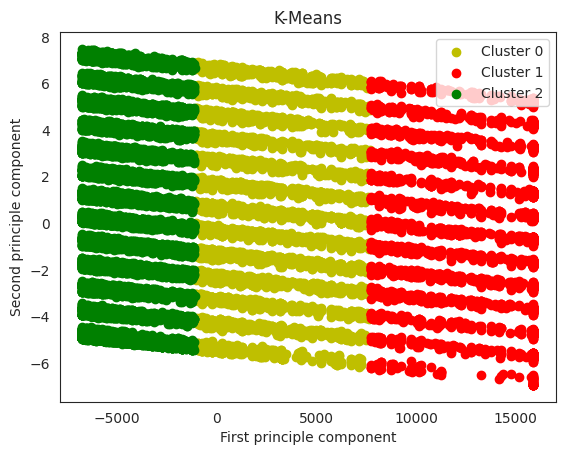

In [ ]:
cluster_colors = ['y', 'r', 'g']
for cluster_id, c in zip(range(3), cluster_colors):
    data = pca_data[y_pred == cluster_id]
    plt.scatter(data[:, 0], data[:, 1], c=c, label=f'Cluster {cluster_id}')

plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title('K-Means')
plt.legend()
plt.show()


#Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error, mean_squared_error

random_forest_model = RandomForestRegressor(n_estimators=200, random_state=42)
random_forest_model.fit(X_train, Y_train)
y_pred = random_forest_model.predict(X_test)
mean_square_error = mean_squared_error(Y_test, y_pred)
mean_absolute_error = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
root_mean_square_error = mean_squared_error(Y_test, y_pred, squared=False)
msle = mean_squared_log_error(Y_test, y_pred)
med_abs_error = median_absolute_error(Y_test, y_pred)
print(f"Mean Squared Error: {mean_square_error}")
print(f"Mean Absolute Error: {mean_absolute_error}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {root_mean_square_error}")

Mean Squared Error: 15019551.069697432
Mean Absolute Error: 2597.919336733898
R-squared: 0.6747686935059981
Root Mean Squared Error: 3875.506556528763


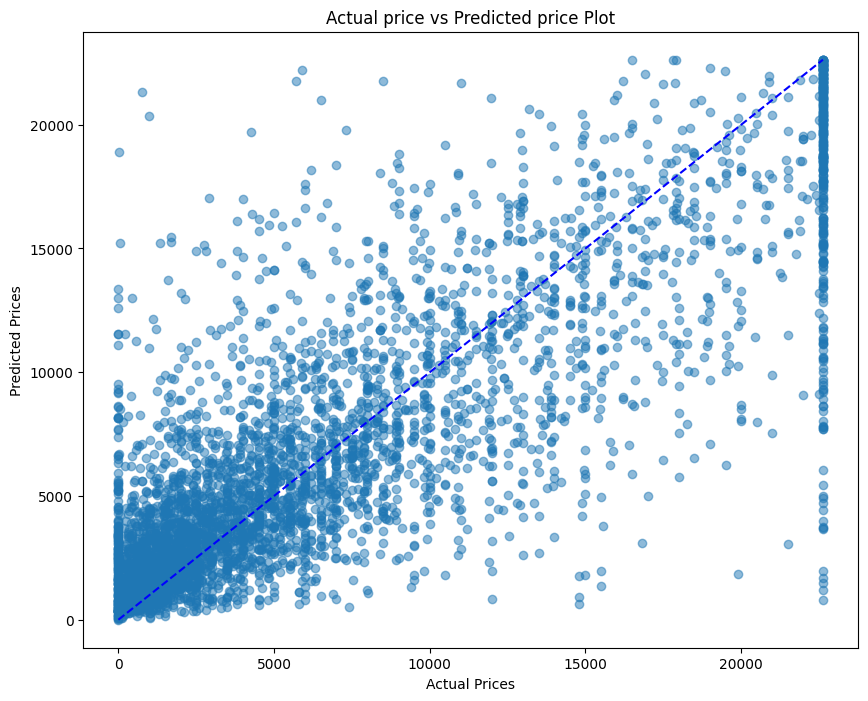

In [ ]:
# Actual price vs predicted price
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual price vs Predicted price Plot')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'b--')
plt.show()

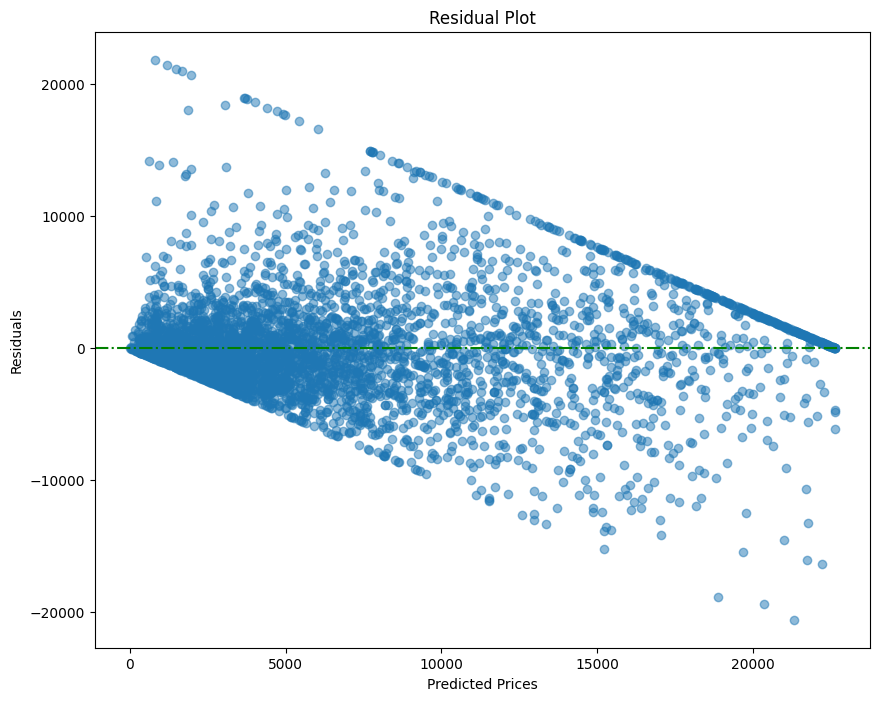

In [ ]:
#Residual plot with predicted price on x-axis and residuals on y-axis
residuals = Y_test - y_pred
plt.figure(figsize=(10, 8))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='g', linestyle='-.')
plt.show()

Feature: monthOfRegistration, Importance: 0.0625016971412579
Feature: abtest_categorical, Importance: 0.013386665552038995
Feature: vehicleType_imputed_categorical, Importance: 0.032018900363697554
Feature: gearbox_imputed_categorical, Importance: 0.014815554995922417
Feature: fuelType_imputed_categorical, Importance: 0.058581411850997946
Feature: notRepairedDamage_imputed_categorical, Importance: 0.04227152980725713
Feature: powerPS_norm, Importance: 0.45526262369050885
Feature: kilometer_norm, Importance: 0.214263544259083
Feature: ad_online_time_norm, Importance: 0.10689807233923627


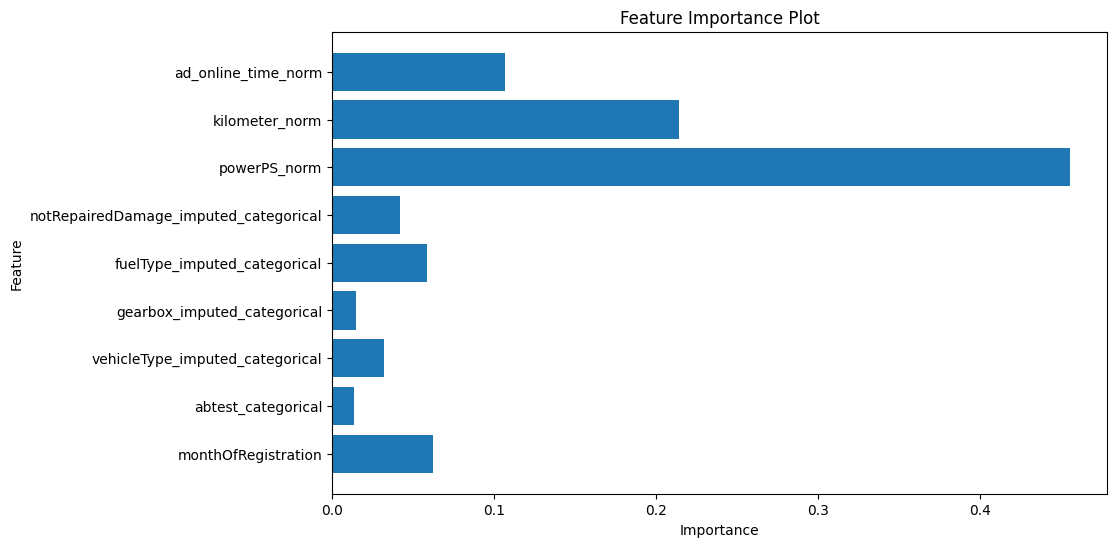

In [ ]:
# Plot for Feature importance
feature_importance = random_forest_model.feature_importances_
features = X_train.columns
importance_list = dict(zip(features, feature_importance))
for feature, importance in importance_list.items():
    print(f"Feature: {feature}, Importance: {importance}")

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

#XGBoost

[0]	validation_0-rmse:5925.57431
[1]	validation_0-rmse:5168.54712
[2]	validation_0-rmse:4604.86074
[3]	validation_0-rmse:4215.92942
[4]	validation_0-rmse:3913.38205
[5]	validation_0-rmse:3703.07863
[6]	validation_0-rmse:3546.16740
[7]	validation_0-rmse:3434.58592
[8]	validation_0-rmse:3350.63462
[9]	validation_0-rmse:3288.06428
[10]	validation_0-rmse:3240.74350
[11]	validation_0-rmse:3198.17999
[12]	validation_0-rmse:3166.44889
[13]	validation_0-rmse:3125.55927
[14]	validation_0-rmse:3084.90367
[15]	validation_0-rmse:3052.54170
[16]	validation_0-rmse:3027.61582
[17]	validation_0-rmse:3010.58062
[18]	validation_0-rmse:3011.08089
[19]	validation_0-rmse:2998.93359
[20]	validation_0-rmse:2990.81312
[21]	validation_0-rmse:2956.21769


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:2947.17098
[23]	validation_0-rmse:2932.76488
[24]	validation_0-rmse:2915.79339
[25]	validation_0-rmse:2913.61074
[26]	validation_0-rmse:2909.53276
[27]	validation_0-rmse:2896.19448
[28]	validation_0-rmse:2893.27786
[29]	validation_0-rmse:2895.67206
[30]	validation_0-rmse:2892.63511
[31]	validation_0-rmse:2889.93571
[32]	validation_0-rmse:2889.80366
[33]	validation_0-rmse:2880.85764
[34]	validation_0-rmse:2878.43762
[35]	validation_0-rmse:2878.45647
[36]	validation_0-rmse:2872.32813
[37]	validation_0-rmse:2865.68064
[38]	validation_0-rmse:2857.13755
[39]	validation_0-rmse:2859.19720
[40]	validation_0-rmse:2856.76135
[41]	validation_0-rmse:2854.26272
[42]	validation_0-rmse:2853.97810
[43]	validation_0-rmse:2849.94843
[44]	validation_0-rmse:2849.52622
[45]	validation_0-rmse:2847.91418
[46]	validation_0-rmse:2844.53568
[47]	validation_0-rmse:2839.81677
[48]	validation_0-rmse:2838.92214
[49]	validation_0-rmse:2832.38248
[50]	validation_0-rmse:2829.93000
[51]	validatio

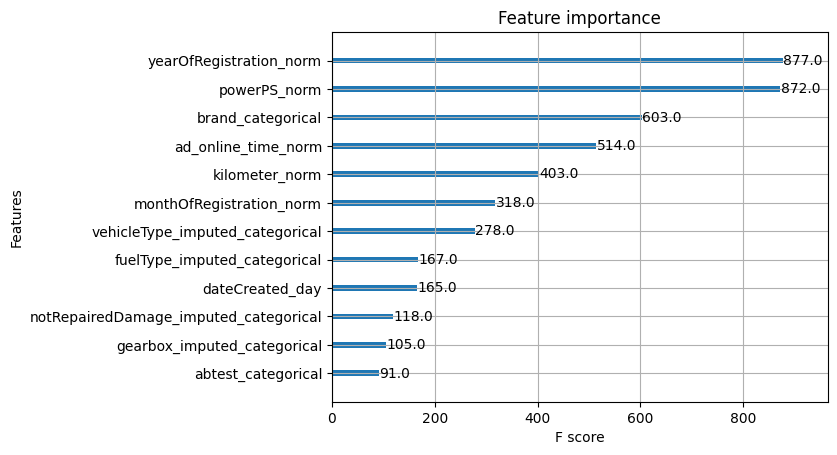

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import plot_importance

xgb_model = XGBRegressor(learning_rate=0.21,reg_alpha=0.8, reg_lambda=1.0, n_estimators=100, random_state=42)
xgb_model.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], early_stopping_rounds=5, verbose=True)
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
plot_importance(xgb_model)
plt.show()



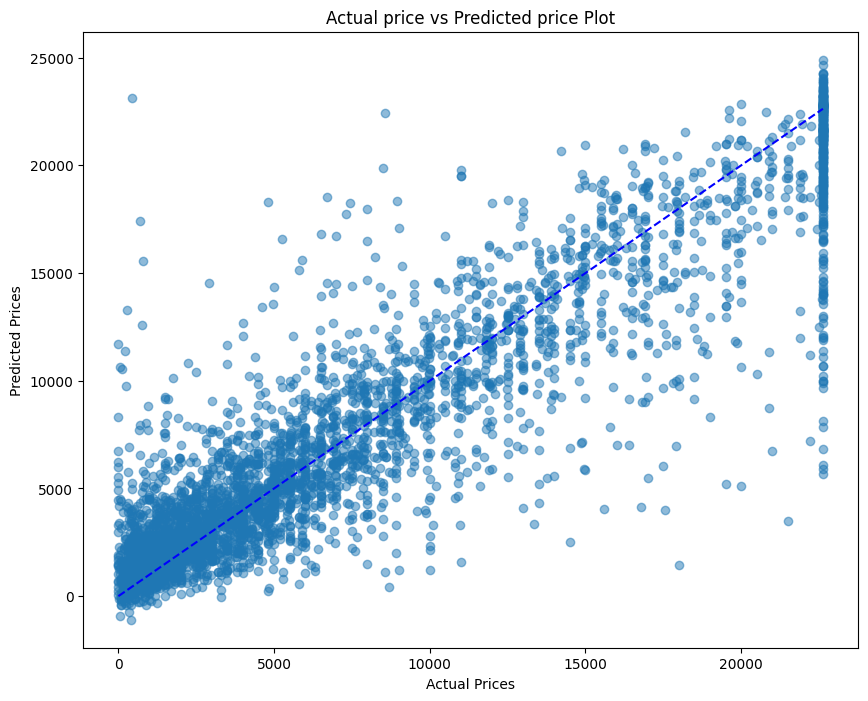

In [ ]:
# Actual price vs predicted price
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual price vs Predicted price Plot')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'b--')
plt.show()

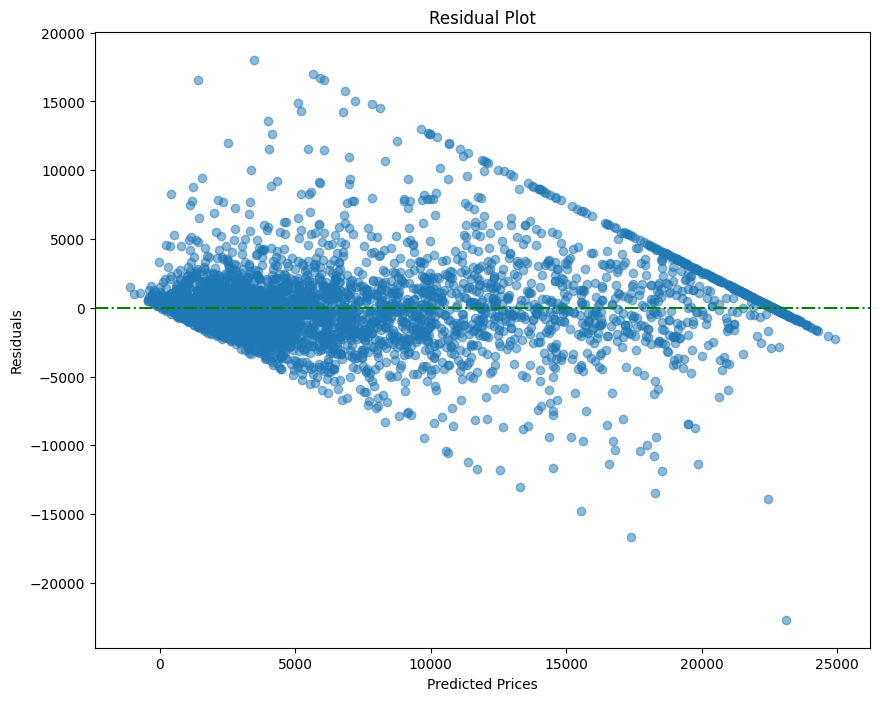

In [ ]:
#Residual plot with predicted price on x-axis and residuals on y-axis
residuals = Y_test - y_pred
plt.figure(figsize=(10, 8))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='g', linestyle='-.')
plt.show()

In [ ]:
import pickle
def save_model(model,filename):
	pickle.dump(model, open(filename, 'wb'))

In [ ]:
save_model(xgb_model, "/content/drive/MyDrive/car_price_pred.pickle")

In [ ]:
def load_model(model,filename):
	return pickle.load(open(filename, 'rb'))

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.21,reg_alpha=0.8, reg_lambda=1.0, n_estimators=100, random_state=42)
xgb_model = load_model(xgb, "/content/drive/MyDrive/dic-phase3_xgboost.pickle")

In [ ]:
from flask import Flask, request, render_template, jsonify, redirect
import numpy as np

In [ ]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

https://b4nt5hu4l0k-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [ ]:
import random

In [ ]:
MOR_min = 1
MOR_max = 12
yearOfRegistration_min = 1982
yearOfRegistration_max = 2019
km_min = 5000
km_max = 15000
powerPS_min = 0
powerPS_max = 12684

In [ ]:
# creating flask app and configuring the HTML template folder
app = Flask(__name__, template_folder='/content/drive/MyDrive/', static_folder='/content/drive/MyDrive/')

# default GET route renders the HTML containing the form with all neccessary car fields
@app.route('/', methods=['GET'])
def home():
    return render_template('car_price_pred.html')

def get_features_values(values, index, feature):
  if feature == 'powerPS':
    vals = [round(random.uniform(0, 0.023), 3) for _ in range(10)]
    # vals = [(x - powerPS_min)/(powerPS_max - powerPS_min) for x in vals_without_norm]
    vals_without_norm = vals
  elif feature == 'km':
    vals_without_norm = [random.randint(5000, 15000) for _ in range(10)]
    vals = [(x - km_min)/(km_max - km_min) for x in vals_without_norm]
  elif feature == 'fuelType':
    vals = [x for x in range(7)]
    vals_without_norm = vals
  diff_values = []
  for i in range(len(vals)):
    diff_values.append(values[:index] + [vals[i]] + values[index+1:])
  return diff_values, vals, vals_without_norm

# /predict route will process the input values user provided and pass them to model for prediction
@app.route('/predict',methods=['GET', 'POST'])
def predict():

  features = request.form.to_dict()
  for key, value in features.items():
    if value == '':
        return render_template('car_price_pred.html', error=1)
    if key == 'MOR':
        features[key] = (int(value) - MOR_min)/(MOR_max - MOR_min) # normalizing input values
    elif key == 'yearOfRegistration':
      features[key] = (int(value) - yearOfRegistration_min)/(yearOfRegistration_max - yearOfRegistration_min)
    elif key == 'km':
      features[key] = (int(value) - km_min)/(km_max - km_min)
    elif key == 'powerPS':
      features[key] = (int(value) - powerPS_min)/(powerPS_max - powerPS_min)
    else:
      features[key] = float(value)

  values = list(features.values())

  values.append(np.random.randint(1, 7))

  ad_online_time = np.random.randint(0, 8919)
  values.append(ad_online_time/8919)

  features = [values]
  prediction = xgb_model.predict(features)

  features_to_change = ['powerPS', 'km', 'fuelType']
  features_ind_to_change = [6, 7, 3]
  result_predictions = []
  result_feature_values = []
  for i in range(3):
    feature_values, vals, vals_without_norm = get_features_values(values, features_ind_to_change[i], features_to_change[i]) # generating different values fr few features for visualization
    preds = []
    for val in feature_values:
      preds.append(xgb_model.predict([val])[0])
    result_predictions.append(preds)
    result_feature_values.append(vals_without_norm)

  return render_template('car_price_pred.html', error=0, output=prediction[0], different_preds=result_predictions, feature_values=result_feature_values)

if __name__=='__main__':
  app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [09/Dec/2023 19:00:02] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Dec/2023 19:00:03] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [09/Dec/2023 19:00:20] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Dec/2023 19:00:20] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [09/Dec/2023 19:07:37] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Dec/2023 19:07:38] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [09/Dec/2023 19:07:40] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Dec/2023 19:07:41] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [09/Dec/2023 19:08:50] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Dec/2023 19:08:50] "GET /favicon.ico H